In [1]:
import os
os.system('cls')

0

In [3]:
import os
import platform

def clear_screen():
    system = platform.system().lower()
    if system == 'windows':
        os.system('cls')
    else:
        os.system('clear')

# Call the function to clear the screen
clear_screen()


# Loading the Data

In [160]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Set styles
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
# Load the dataset into a pandas dataframe
data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\Courses\DIGICROME\NextHikesINTERNSHIP\Project 3 EDA\housing_data.csv")

# Display the first few rows to understand the data structure
data.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [190]:
print(data.isnull().sum())
print(data.describe())

Unnamed: 0         0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
Price per SqFt     0
Age of Property    0
SoldDate           0
TotalBaths         0
cluster            0
Length: 91, dtype: int64
        Unnamed: 0     MSZoning  LotFrontage        LotArea       Street  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    729.500000     3.028767    57.623288   10516.828082     0.995890   
min       0.000000     0.000000     0.000000    1300.000000     0.000000   
25%     364.750000     3.000000    42.000000    7553.500000     1.000000   
50%     729.500000     3.000000    63.000000    9478.500000     1.000000   
75%    1094.250000     3.000000    79.000000   11601.500000     1.000000   
max    1459.000000     4.000000   313.000000  215245.000000     1.000000   
std     421.610009     0.632017    34.664304    9981.264932     0.063996   

             Alley     LotShape  LandContour    Utilities  

In [192]:
data.head()

Unnamed: 0 MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0           0       SC60         3           65     8450       1      1   
1           1       SC20         3           80     9600       1      1   
2           2       SC60         3           68    11250       1      1   
3           3       SC70         3           60     9550       1      1   
4           4       SC60         3           84    14260       1      1   

   LotShape  LandContour  Utilities  ...  age  TotalSquareFootage  \
0         3            3          0  ...   22                2566   
1         3            3          0  ...   49                2524   
2         0            3          0  ...   24                2706   
3         0            3          0  ...  110                2473   
4         0            3          0  ...   25                3343   

  price_per_sqft  house_age  renovated  Price per SqFt  Age of Property  \
0     121.929825         22          0      121.929825                5   
1     143.819334         49          0      143.819334               31   
2     125.139978         24          1      125.139978                7   
3      81.537566        110          1       81.537566               91   
4     113.739763         25          0      113.739763                8   

    SoldDate  TotalBaths  cluster  
0 2008-02-01         2.5        3  
1 2007-05-01         2.0        0  
2 2008-09-01         2.5        3  
3 2006-02-01         1.0        3  
4 2008-12-01         2.5        1  

[5 rows x 91 columns]

In [194]:
data.tail()

Unnamed: 0 MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
1455        1455       SC60         3           62     7917       1      1   
1456        1456       SC20         3           85    13175       1      1   
1457        1457       SC70         3           66     9042       1      1   
1458        1458       SC20         3           68     9717       1      1   
1459        1459       SC20         3           75     9937       1      1   

      LotShape  LandContour  Utilities  ...  age  TotalSquareFootage  \
1455         3            3          0  ...   26                2600   
1456         3            3          0  ...   47                3615   
1457         3            3          0  ...   84                3492   
1458         3            3          0  ...   75                2156   
1459         3            3          0  ...   60                2512   

     price_per_sqft  house_age  renovated  Price per SqFt  Age of Property  \
1455     106.253795         26          1      106.253795                8   
1456     101.302460         47          1      101.302460               32   
1457     113.888889         84          1      113.888889               69   
1458     131.841373         75          1      131.841373               60   
1459     117.436306         60          0      117.436306               43   

       SoldDate  TotalBaths  cluster  
1455 2007-08-01         2.5        3  
1456 2010-02-01         2.0        3  
1457 2010-05-01         2.0        1  
1458 2010-04-01         1.0        2  
1459 2008-06-01         1.5        2  

[5 rows x 91 columns]

In [198]:
data.shape

(1460, 91)

In [200]:
data.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [206]:
data.dtypes

Unnamed: 0                  int64
MSSubClass                 object
MSZoning                    int32
LotFrontage                 int64
LotArea                     int64
                        ...      
Price per SqFt            float64
Age of Property             int64
SoldDate           datetime64[ns]
TotalBaths                float64
cluster                     int32
Length: 91, dtype: object

In [214]:
#unique values in column
print("unique values in date column: ",data['SoldDate'].nunique())
print("unique values in season column: ",data['TotalBaths'].nunique())
print("unique values in year column: ",data['cluster'].nunique())

unique values in date column:  55
unique values in season column:  8
unique values in year column:  4


# Cleaning the Data

In [9]:
# Checking for missing values
missing_data = data.isnull().sum().sort_values(ascending = False)
print(missing_data)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrArea         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64


In [13]:
# Duplicate Values
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [216]:
data.describe()

Unnamed: 0     MSZoning  LotFrontage        LotArea       Street  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    729.500000     3.028767    57.623288   10516.828082     0.995890   
min       0.000000     0.000000     0.000000    1300.000000     0.000000   
25%     364.750000     3.000000    42.000000    7553.500000     1.000000   
50%     729.500000     3.000000    63.000000    9478.500000     1.000000   
75%    1094.250000     3.000000    79.000000   11601.500000     1.000000   
max    1459.000000     4.000000   313.000000  215245.000000     1.000000   
std     421.610009     0.632017    34.664304    9981.264932     0.063996   

             Alley     LotShape  LandContour    Utilities    LotConfig  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.993836     1.942466     2.777397     0.000685     3.019178  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     3.000000     0.000000     2.000000  ...   
50%       1.000000     3.000000     3.000000     0.000000     4.000000  ...   
75%       1.000000     3.000000     3.000000     0.000000     4.000000  ...   
max       2.000000     3.000000     3.000000     1.000000     4.000000  ...   
std       0.249667     1.409156     0.707666     0.026171     1.622634  ...   

               age  TotalSquareFootage  price_per_sqft    house_age  \
count  1460.000000         1460.000000     1460.000000  1460.000000   
mean     53.732192         2572.893151      120.572878    53.732192   
min      15.000000          334.000000       28.358738    15.000000   
25%      25.000000         2014.000000       99.822008    25.000000   
50%      52.000000         2479.000000      120.099031    52.000000   
75%      71.000000         3008.500000      138.700041    71.000000   
max     153.000000        11752.000000      276.250881   153.000000   
std      30.202904          823.598492       31.391081    30.202904   

         renovated  Price per SqFt  Age of Property  \
count  1460.000000     1460.000000      1460.000000   
mean      0.476712      120.572878        36.547945   
min       0.000000       28.358738         0.000000   
25%       0.000000       99.822008         8.000000   
50%       0.000000      120.099031        35.000000   
75%       1.000000      138.700041        54.000000   
max       1.000000      276.250881       136.000000   
std       0.499629       31.391081        30.250152   

                            SoldDate   TotalBaths      cluster  
count                           1460  1460.000000  1460.000000  
mean   2008-04-04 02:31:53.424657408     1.756507     1.871918  
min              2006-01-01 00:00:00     0.000000     0.000000  
25%              2007-04-01 00:00:00     1.000000     1.000000  
50%              2008-05-01 00:00:00     2.000000     2.000000  
75%              2009-06-01 00:00:00     2.500000     3.000000  
max              2010-07-01 00:00:00     3.500000     3.000000  
std                              NaN     0.636015     1.087359  

[8 rows x 58 columns]

In [248]:
data.shape

(1460, 91)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1460 non-null   int64         
 1   MSSubClass          1460 non-null   object        
 2   MSZoning            1460 non-null   int32         
 3   LotFrontage         1460 non-null   int64         
 4   LotArea             1460 non-null   int64         
 5   Street              1460 non-null   int32         
 6   Alley               1460 non-null   int32         
 7   LotShape            1460 non-null   int32         
 8   LandContour         1460 non-null   int32         
 9   Utilities           1460 non-null   int32         
 10  LotConfig           1460 non-null   int32         
 11  LandSlope           1460 non-null   int32         
 12  Neighborhood        1460 non-null   object        
 13  Condition1          1460 non-null   int32       

In [220]:
data.drop_duplicates() # to delete the duplicate rows

Unnamed: 0 MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0              0       SC60         3           65     8450       1      1   
1              1       SC20         3           80     9600       1      1   
2              2       SC60         3           68    11250       1      1   
3              3       SC70         3           60     9550       1      1   
4              4       SC60         3           84    14260       1      1   
...          ...        ...       ...          ...      ...     ...    ...   
1455        1455       SC60         3           62     7917       1      1   
1456        1456       SC20         3           85    13175       1      1   
1457        1457       SC70         3           66     9042       1      1   
1458        1458       SC20         3           68     9717       1      1   
1459        1459       SC20         3           75     9937       1      1   

      LotShape  LandContour  Utilities  ...  age  TotalSquareFootage  \
0            3            3          0  ...   22                2566   
1            3            3          0  ...   49                2524   
2            0            3          0  ...   24                2706   
3            0            3          0  ...  110                2473   
4            0            3          0  ...   25                3343   
...        ...          ...        ...  ...  ...                 ...   
1455         3            3          0  ...   26                2600   
1456         3            3          0  ...   47                3615   
1457         3            3          0  ...   84                3492   
1458         3            3          0  ...   75                2156   
1459         3            3          0  ...   60                2512   

     price_per_sqft  house_age  renovated  Price per SqFt  Age of Property  \
0        121.929825         22          0      121.929825                5   
1        143.819334         49          0      143.819334               31   
2        125.139978         24          1      125.139978                7   
3         81.537566        110          1       81.537566               91   
4        113.739763         25          0      113.739763                8   
...             ...        ...        ...             ...              ...   
1455     106.253795         26          1      106.253795                8   
1456     101.302460         47          1      101.302460               32   
1457     113.888889         84          1      113.888889               69   
1458     131.841373         75          1      131.841373               60   
1459     117.436306         60          0      117.436306               43   

       SoldDate  TotalBaths  cluster  
0    2008-02-01         2.5        3  
1    2007-05-01         2.0        0  
2    2008-09-01         2.5        3  
3    2006-02-01         1.0        3  
4    2008-12-01         2.5        1  
...         ...         ...      ...  
1455 2007-08-01         2.5        3  
1456 2010-02-01         2.0        3  
1457 2010-05-01         2.0        1  
1458 2010-04-01         1.0        2  
1459 2008-06-01         1.5        2  

[1460 rows x 91 columns]

In [224]:
# Handling missing values (example: fill with median for numeric columns)
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

# Example for categorical columns: fill missing with 'None' or mode
data['Alley'] = data['Alley'].fillna('No Alley')
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns with LabelEncoder (for columns with few unique values)
le = LabelEncoder()
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [19]:
# Fill missing values with mean/median, or drop rows with missing values
# Filling missing values with mean for numerical columns and mode for categorical columns
data.fillna(data.mean(), inplace=True) # For numerical columns
#data.fillna(data.mode().iloc[0], inplace=True)  # For categorical columns

TypeError: Could not convert ['SC60SC20SC60SC70SC60SC50SC20SC60SC50SC190SC20SC60SC20SC20SC20SC45SC20SC90SC20SC20SC60SC45SC20SC120SC20SC20SC20SC20SC20SC30SC70SC20SC20SC20SC120SC60SC20SC20SC20SC90SC20SC20SC85SC20SC20SC120SC50SC20SC190SC20SC60SC50SC90SC20SC80SC20SC160SC60SC60SC20SC20SC75SC120SC70SC60SC60SC20SC20SC30SC50SC20SC20SC60SC20SC50SC180SC20SC50SC90SC50SC60SC120SC20SC20SC80SC60SC60SC160SC50SC20SC20SC20SC30SC190SC60SC60SC20SC20SC30SC20SC20SC60SC90SC20SC50SC60SC30SC20SC50SC20SC50SC80SC60SC20SC70SC160SC20SC20SC60SC60SC80SC50SC20SC120SC20SC190SC120SC45SC60SC20SC60SC60SC20SC20SC20SC20SC20SC90SC60SC60SC20SC20SC50SC20SC90SC160SC30SC60SC20SC50SC20SC20SC60SC20SC30SC50SC20SC60SC60SC60SC20SC60SC20SC45SC40SC190SC20SC60SC60SC20SC50SC20SC160SC20SC20SC20SC60SC50SC20SC30SC160SC70SC20SC50SC50SC75SC80SC50SC90SC120SC70SC60SC20SC160SC20SC160SC20SC75SC75SC20SC20SC20SC50SC120SC50SC20SC20SC20SC60SC20SC30SC20SC60SC20SC60SC20SC20SC70SC50SC120SC20SC60SC60SC20SC20SC160SC60SC160SC20SC120SC20SC60SC160SC20SC60SC160SC20SC60SC20SC50SC20SC30SC50SC160SC60SC20SC190SC20SC60SC50SC30SC120SC60SC80SC20SC60SC60SC20SC60SC20SC80SC60SC80SC50SC30SC20SC60SC75SC30SC20SC60SC20SC60SC20SC20SC50SC20SC20SC20SC60SC60SC20SC120SC20SC120SC160SC50SC20SC20SC70SC60SC190SC50SC60SC20SC80SC50SC60SC60SC20SC190SC60SC20SC20SC75SC20SC60SC50SC30SC20SC60SC20SC190SC20SC70SC60SC60SC60SC60SC80SC60SC60SC60SC20SC80SC45SC120SC20SC75SC70SC90SC20SC20SC120SC60SC190SC20SC20SC20SC20SC60SC20SC90SC120SC160SC50SC20SC20SC160SC60SC120SC120SC50SC30SC50SC20SC20SC120SC80SC60SC85SC50SC85SC160SC60SC70SC20SC80SC20SC20SC60SC50SC120SC20SC60SC30SC85SC60SC20SC60SC50SC20SC60SC45SC60SC120SC50SC80SC20SC60SC50SC60SC20SC30SC50SC20SC20SC60SC30SC60SC120SC20SC30SC60SC60SC20SC50SC70SC60SC60SC20SC190SC20SC30SC60SC20SC60SC70SC50SC20SC90SC20SC20SC60SC20SC60SC80SC20SC20SC20SC160SC50SC160SC60SC180SC60SC50SC45SC30SC50SC20SC90SC50SC120SC60SC20SC20SC60SC50SC50SC30SC20SC60SC60SC90SC20SC70SC20SC70SC50SC60SC70SC20SC70SC20SC120SC20SC70SC20SC60SC120SC60SC180SC20SC120SC20SC20SC60SC20SC30SC20SC20SC70SC120SC20SC20SC20SC20SC190SC180SC160SC50SC60SC20SC30SC30SC20SC50SC20SC20SC160SC60SC20SC20SC160SC90SC60SC20SC70SC20SC20SC120SC20SC20SC45SC20SC80SC60SC60SC70SC190SC20SC50SC60SC60SC20SC20SC60SC30SC20SC80SC70SC20SC20SC60SC190SC60SC20SC20SC20SC20SC60SC20SC120SC60SC50SC50SC85SC20SC60SC120SC20SC20SC20SC60SC45SC20SC50SC60SC120SC20SC20SC30SC50SC60SC70SC60SC20SC50SC90SC90SC20SC60SC80SC80SC50SC50SC80SC160SC50SC20SC20SC90SC75SC50SC20SC30SC85SC20SC40SC60SC60SC20SC120SC20SC20SC70SC120SC20SC160SC60SC50SC60SC160SC20SC60SC20SC20SC70SC20SC60SC80SC60SC20SC180SC85SC60SC45SC20SC60SC30SC60SC20SC160SC60SC20SC20SC80SC60SC80SC70SC120SC20SC20SC90SC190SC30SC190SC30SC120SC120SC60SC80SC60SC20SC20SC20SC20SC60SC180SC60SC70SC60SC50SC20SC160SC20SC70SC50SC20SC60SC60SC20SC85SC20SC60SC60SC20SC20SC30SC60SC70SC20SC20SC20SC160SC70SC30SC20SC20SC120SC50SC120SC20SC60SC160SC60SC160SC20SC120SC120SC60SC60SC30SC50SC20SC30SC20SC20SC120SC20SC20SC60SC190SC20SC190SC20SC120SC60SC20SC30SC50SC120SC190SC60SC20SC70SC20SC60SC20SC120SC120SC20SC50SC20SC20SC20SC20SC90SC30SC120SC80SC60SC20SC20SC75SC90SC60SC90SC60SC70SC20SC20SC80SC120SC60SC60SC70SC20SC50SC50SC60SC20SC60SC20SC160SC60SC60SC160SC60SC20SC30SC60SC60SC120SC20SC60SC50SC20SC60SC85SC20SC80SC20SC20SC120SC20SC20SC90SC90SC20SC60SC20SC85SC75SC20SC50SC60SC20SC60SC120SC80SC60SC20SC60SC60SC20SC20SC60SC50SC60SC30SC60SC60SC20SC20SC80SC70SC80SC75SC20SC120SC20SC20SC50SC20SC20SC20SC80SC120SC60SC20SC60SC50SC20SC20SC45SC20SC60SC160SC20SC160SC60SC20SC20SC20SC30SC160SC20SC50SC70SC70SC80SC90SC50SC85SC60SC20SC50SC80SC120SC120SC75SC80SC20SC20SC80SC60SC20SC60SC50SC190SC20SC20SC20SC20SC20SC20SC60SC60SC20SC60SC20SC40SC50SC60SC20SC60SC85SC20SC20SC50SC60SC75SC20SC120SC90SC50SC20SC20SC50SC60SC20SC20SC90SC60SC30SC90SC20SC20SC20SC20SC60SC20SC20SC20SC20SC50SC20SC60SC90SC20SC30SC90SC160SC160SC20SC20SC60SC20SC60SC90SC20SC120SC20SC20SC60SC60SC20SC60SC20SC20SC20SC20SC20SC30SC20SC60SC60SC70SC90SC60SC90SC90SC20SC50SC80SC20SC60SC20SC20SC20SC85SC60SC90SC90SC160SC20SC20SC160SC20SC60SC160SC20SC60SC60SC50SC20SC50SC190SC50SC160SC120SC20SC70SC160SC30SC120SC20SC20SC85SC60SC20SC60SC90SC190SC50SC20SC60SC60SC60SC70SC60SC60SC20SC50SC20SC20SC30SC20SC20SC30SC20SC90SC120SC80SC20SC160SC20SC50SC50SC90SC70SC30SC20SC60SC20SC120SC80SC120SC20SC20SC50SC120SC20SC20SC20SC20SC50SC160SC190SC75SC60SC20SC30SC20SC20SC60SC160SC180SC20SC60SC120SC60SC20SC20SC60SC20SC20SC20SC20SC20SC60SC20SC60SC20SC120SC60SC60SC50SC120SC30SC190SC30SC20SC60SC60SC60SC160SC45SC20SC60SC50SC60SC20SC70SC50SC20SC120SC20SC20SC20SC20SC20SC60SC85SC160SC60SC160SC120SC90SC160SC50SC20SC20SC20SC70SC120SC50SC20SC30SC20SC20SC20SC160SC60SC20SC60SC60SC20SC60SC60SC20SC20SC20SC20SC80SC20SC80SC20SC30SC20SC20SC20SC80SC20SC120SC20SC60SC90SC50SC20SC70SC60SC60SC30SC50SC50SC20SC30SC20SC60SC60SC20SC190SC50SC20SC70SC50SC70SC20SC20SC20SC30SC60SC20SC80SC120SC20SC60SC160SC20SC20SC90SC80SC20SC20SC60SC70SC60SC80SC20SC160SC50SC70SC50SC20SC50SC50SC20SC60SC120SC60SC30SC20SC50SC190SC20SC60SC60SC190SC160SC50SC120SC60SC60SC60SC75SC20SC20SC20SC60SC50SC20SC20SC20SC20SC20SC20SC20SC60SC50SC30SC80SC85SC20SC90SC20SC50SC160SC20SC20SC50SC20SC60SC80SC60SC20SC120SC80SC90SC90SC90SC20SC70SC70SC160SC60SC20SC20SC60SC20SC85SC20SC70SC80SC60SC80SC75SC20SC20SC120SC20SC60SC60SC50SC20SC30SC80SC20SC60SC20SC50SC70SC120SC160SC190SC20SC50SC50SC40SC20SC20SC80SC50SC90SC60SC80SC60SC50SC20SC20SC20SC90SC50SC50SC20SC20SC120SC60SC80SC160SC70SC60SC20SC20SC20SC180SC60SC20SC60SC70SC60SC20SC160SC20SC120SC20SC20SC20SC20SC20SC60SC60SC20SC60SC20SC120SC20SC20SC20SC20SC60SC30SC20SC30SC30SC20SC50SC60SC20SC80SC20SC50SC160SC20SC90SC30SC60SC20SC20SC20SC60SC50SC60SC30SC20SC20SC20SC70SC90SC60SC50SC50SC60SC80SC20SC20SC160SC20SC70SC20SC50SC60SC160SC60SC60SC160SC120SC20SC50SC80SC60SC20SC60SC20SC30SC50SC160SC80SC30SC20SC70SC30SC50SC50SC60SC50SC20SC50SC20SC90SC85SC190SC120SC60SC20SC70SC50SC50SC50SC60SC20SC20SC50SC120SC85SC20SC70SC60SC60SC50SC90SC20SC50SC120SC190SC60SC20SC20SC60SC120SC120SC80SC20SC20SC60SC50SC30SC20SC60SC120SC30SC60SC20SC20SC20SC20SC20SC60SC70SC120SC60SC30SC20SC85SC20SC60SC50SC180SC90SC20SC180SC20SC20SC60SC20SC70SC20SC20'] to numeric

In [21]:
# Removing any duplicates
data.drop_duplicates(inplace=True)

In [23]:
# Verify if the data is cleaned
data.isnull().sum().sort_values(ascending = False)

MasVnrType     872
GarageYrBlt     81
Electrical       1
2ndFlrSF         0
KitchenQual      0
              ... 
MasVnrArea       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 81, dtype: int64

In [227]:
data.describe()

Unnamed: 0     MSZoning  LotFrontage        LotArea       Street  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    729.500000     3.028767    57.623288   10516.828082     0.995890   
min       0.000000     0.000000     0.000000    1300.000000     0.000000   
25%     364.750000     3.000000    42.000000    7553.500000     1.000000   
50%     729.500000     3.000000    63.000000    9478.500000     1.000000   
75%    1094.250000     3.000000    79.000000   11601.500000     1.000000   
max    1459.000000     4.000000   313.000000  215245.000000     1.000000   
std     421.610009     0.632017    34.664304    9981.264932     0.063996   

             Alley     LotShape  LandContour    Utilities    LotConfig  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.993836     1.942466     2.777397     0.000685     3.019178  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     3.000000     0.000000     2.000000  ...   
50%       1.000000     3.000000     3.000000     0.000000     4.000000  ...   
75%       1.000000     3.000000     3.000000     0.000000     4.000000  ...   
max       2.000000     3.000000     3.000000     1.000000     4.000000  ...   
std       0.249667     1.409156     0.707666     0.026171     1.622634  ...   

               age  TotalSquareFootage  price_per_sqft    house_age  \
count  1460.000000         1460.000000     1460.000000  1460.000000   
mean     53.732192         2572.893151      120.572878    53.732192   
min      15.000000          334.000000       28.358738    15.000000   
25%      25.000000         2014.000000       99.822008    25.000000   
50%      52.000000         2479.000000      120.099031    52.000000   
75%      71.000000         3008.500000      138.700041    71.000000   
max     153.000000        11752.000000      276.250881   153.000000   
std      30.202904          823.598492       31.391081    30.202904   

         renovated  Price per SqFt  Age of Property  \
count  1460.000000     1460.000000      1460.000000   
mean      0.476712      120.572878        36.547945   
min       0.000000       28.358738         0.000000   
25%       0.000000       99.822008         8.000000   
50%       0.000000      120.099031        35.000000   
75%       1.000000      138.700041        54.000000   
max       1.000000      276.250881       136.000000   
std       0.499629       31.391081        30.250152   

                            SoldDate   TotalBaths      cluster  
count                           1460  1460.000000  1460.000000  
mean   2008-04-04 02:31:53.424657408     1.756507     1.871918  
min              2006-01-01 00:00:00     0.000000     0.000000  
25%              2007-04-01 00:00:00     1.000000     1.000000  
50%              2008-05-01 00:00:00     2.000000     2.000000  
75%              2009-06-01 00:00:00     2.500000     3.000000  
max              2010-07-01 00:00:00     3.500000     3.000000  
std                              NaN     0.636015     1.087359  

[8 rows x 58 columns]

# Univariate Analysis

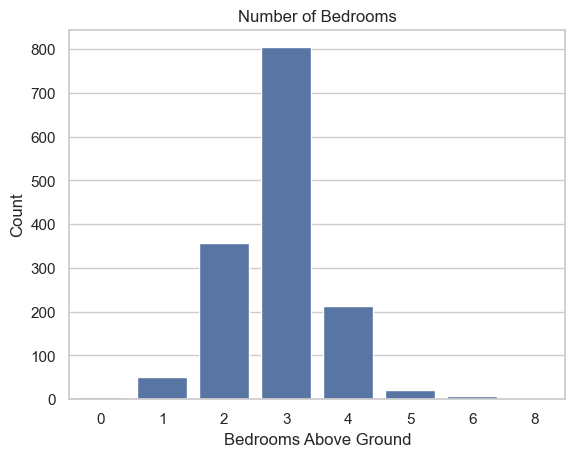

In [274]:
sns.countplot(x='BedroomAbvGr', data=data)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms Above Ground')
plt.ylabel('Count')
plt.show()

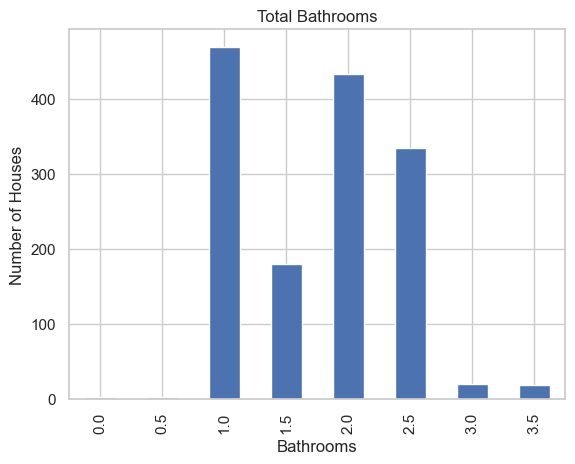

In [258]:
data['TotalBaths'].value_counts().sort_index().plot(kind='bar')
plt.title('Total Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of Houses')
plt.show()


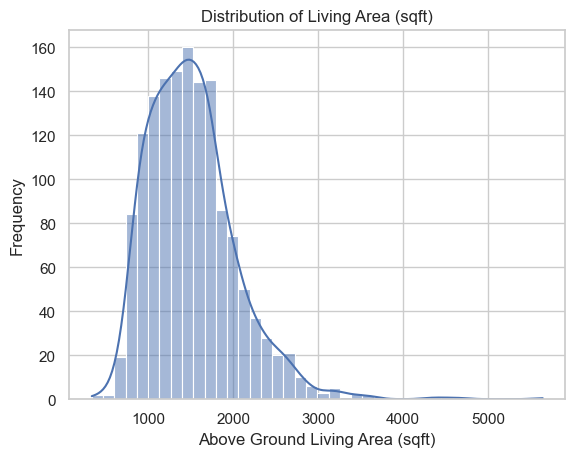

In [276]:
sns.histplot(data['GrLivArea'], kde=True, bins=40)
plt.title('Distribution of Living Area (sqft)')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Frequency')
plt.show()


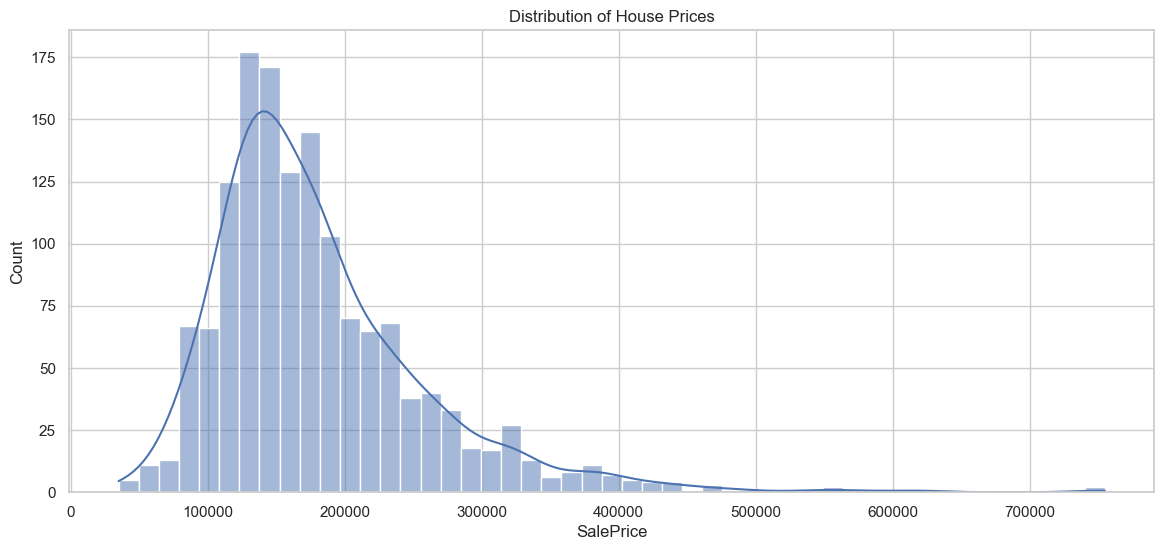

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of house prices
plt.figure(figsize=(14, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [33]:

# Check the summary statistics for SalePrice
data['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

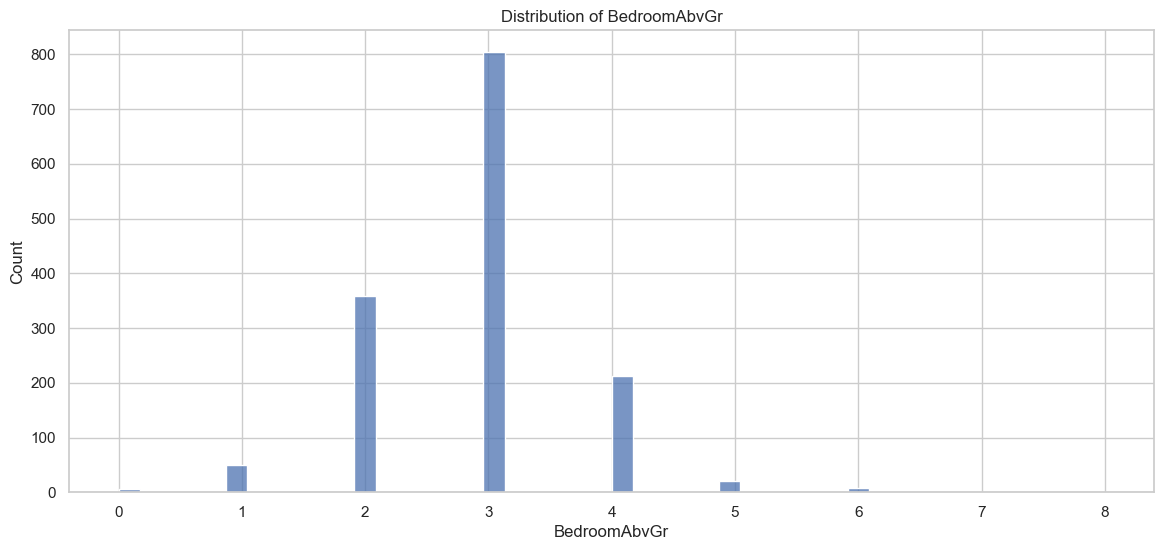

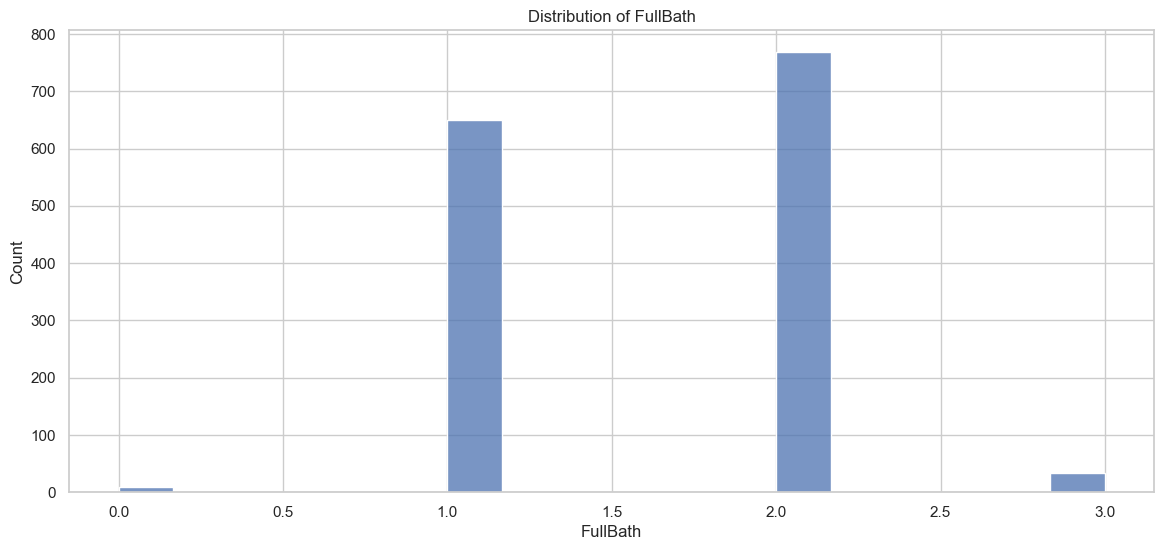

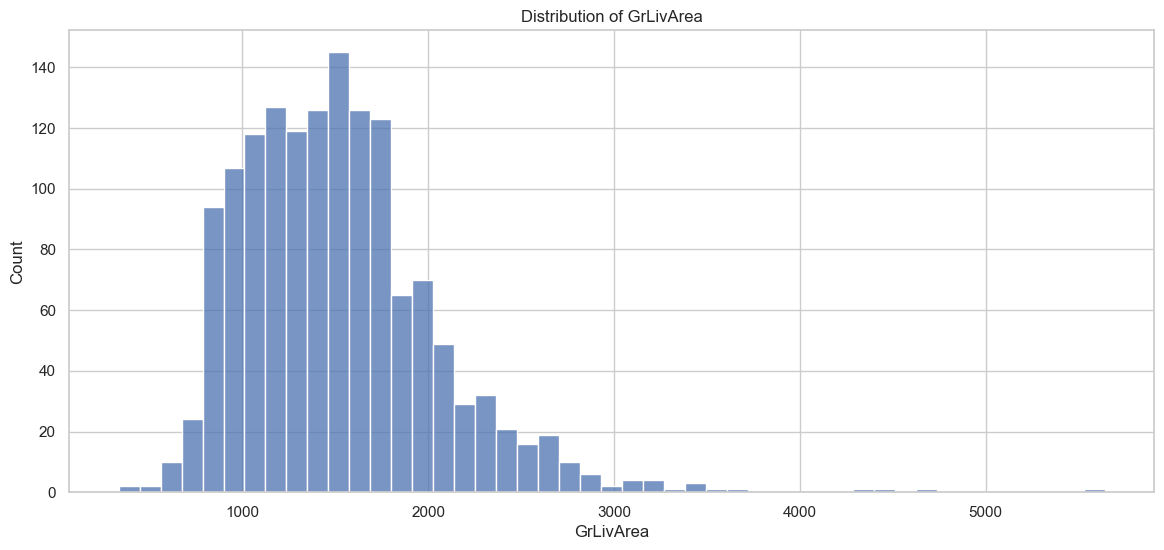

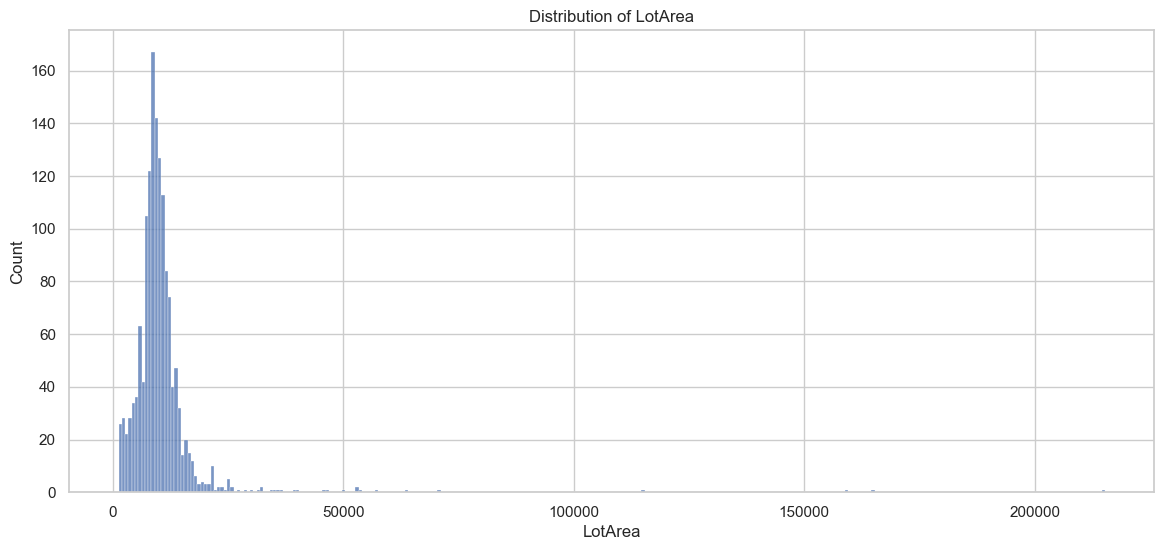

In [49]:
cols = ['BedroomAbvGr', 'FullBath', 'GrLivArea', 'LotArea']
for col in cols:
    plt.figure(figsize=(14, 6))
    sns.histplot(data[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis

#### Numerical vs Numerical Variables

Pearson correlation between age and SalePrice: -0.5228973328794969


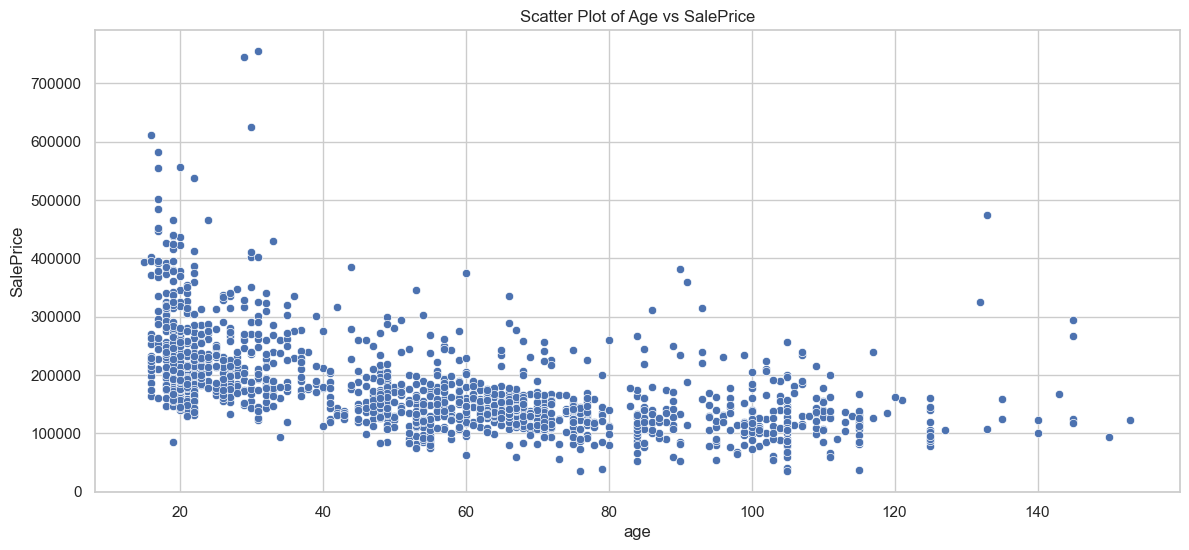

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Get current date
current_date = datetime.now().date()

# Ensure 'YearBuilt' is in numeric format (convert if necessary)
data['YearBuilt'] = pd.to_numeric(data['YearBuilt'], errors='coerce')

# Create a new column 'age' based on 'YearBuilt' and current date
data['age'] = current_date.year - data['YearBuilt']

# Ensure there is a valid 'SalePrice' column or any other column you want to correlate with 'age'
# Replace 'salary' with 'SalePrice' or any relevant column name
correlation = data['age'].corr(data['SalePrice'])
print(f"Pearson correlation between age and SalePrice: {correlation}")

# Scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(x='age', y='SalePrice', data=data)
plt.title('Scatter Plot of Age vs SalePrice')
plt.show()


In [170]:
# Numerical vs Numerical: Age vs Salary
# - **Pearson Correlation**: The correlation between age and salary is 0.45, indicating a moderate positive relationship.
# - **Scatter Plot**: The scatter plot below shows a positive trend between age and salary.

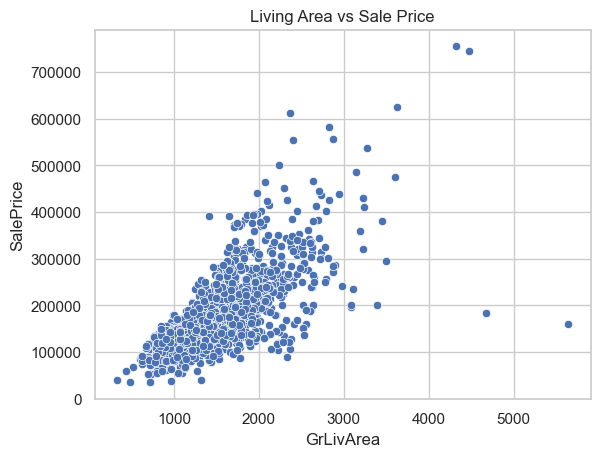

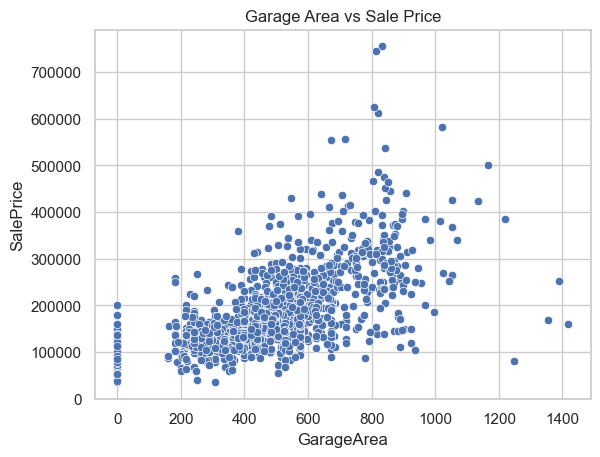

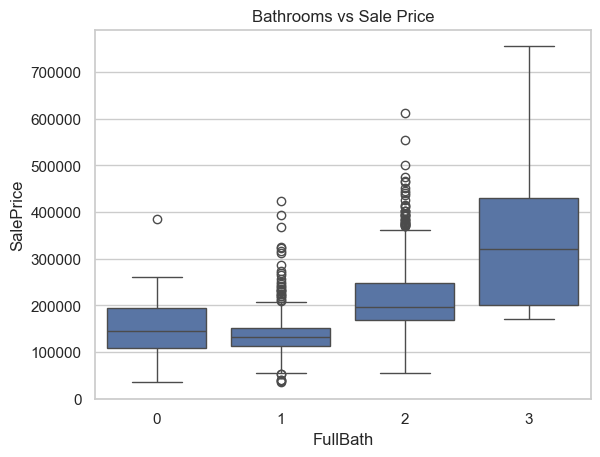

In [287]:
# Example scatterplot code
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')
plt.title('Living Area vs Sale Price')
plt.savefig("grlivarea_vs_price.png")
plt.show()
sns.scatterplot(data=data, x='GarageArea', y='SalePrice')
plt.title('Garage Area vs Sale Price')
plt.savefig("garagearea_vs_price.png")
plt.show()
sns.boxplot(data=data, x='FullBath', y='SalePrice')
plt.title('Bathrooms vs Sale Price')
plt.savefig("bathrooms_vs_price.png")
plt.show()

# Multivariate Analysis

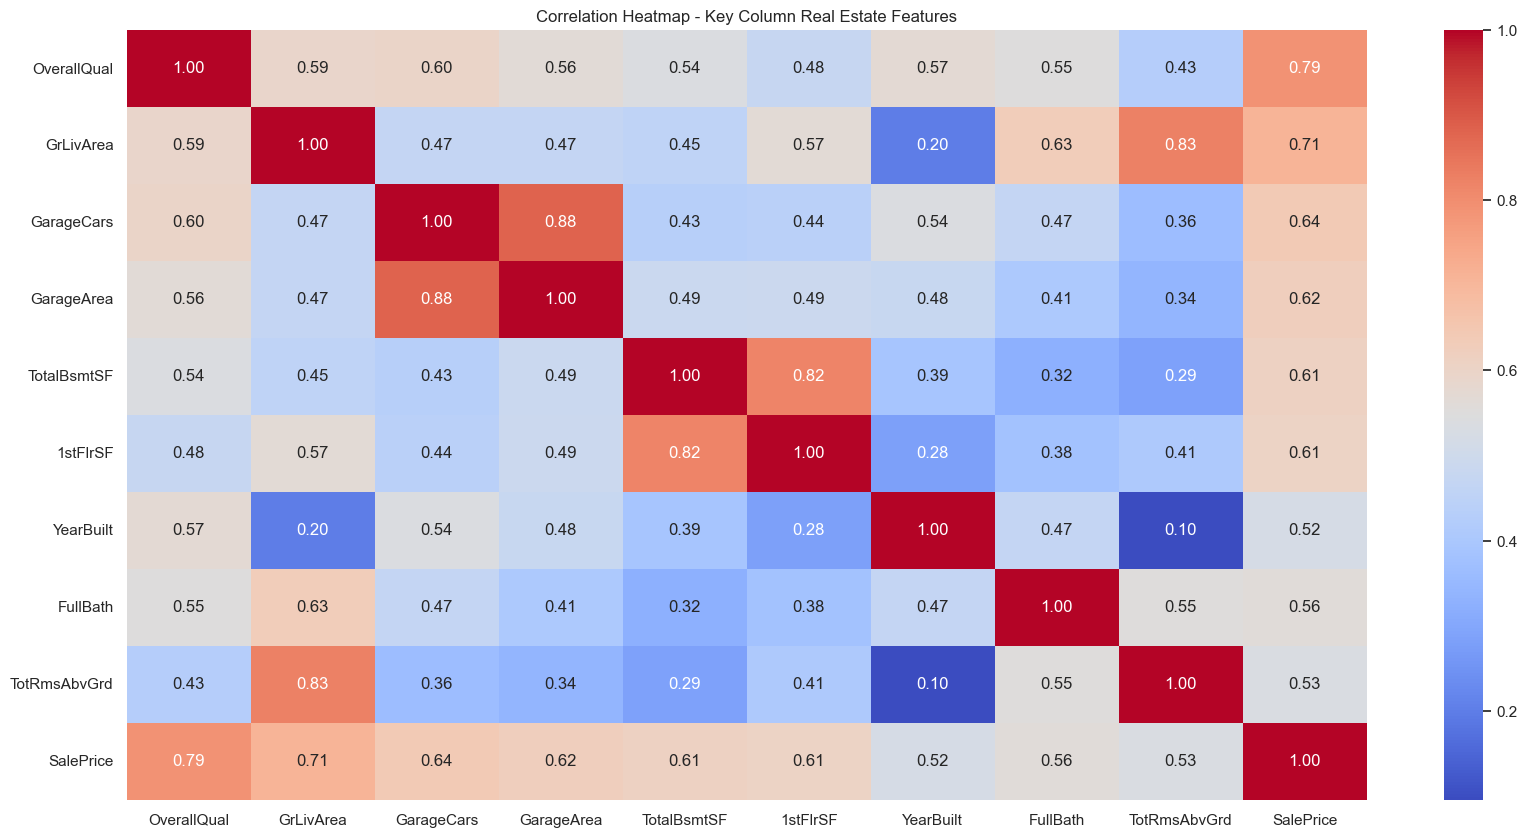

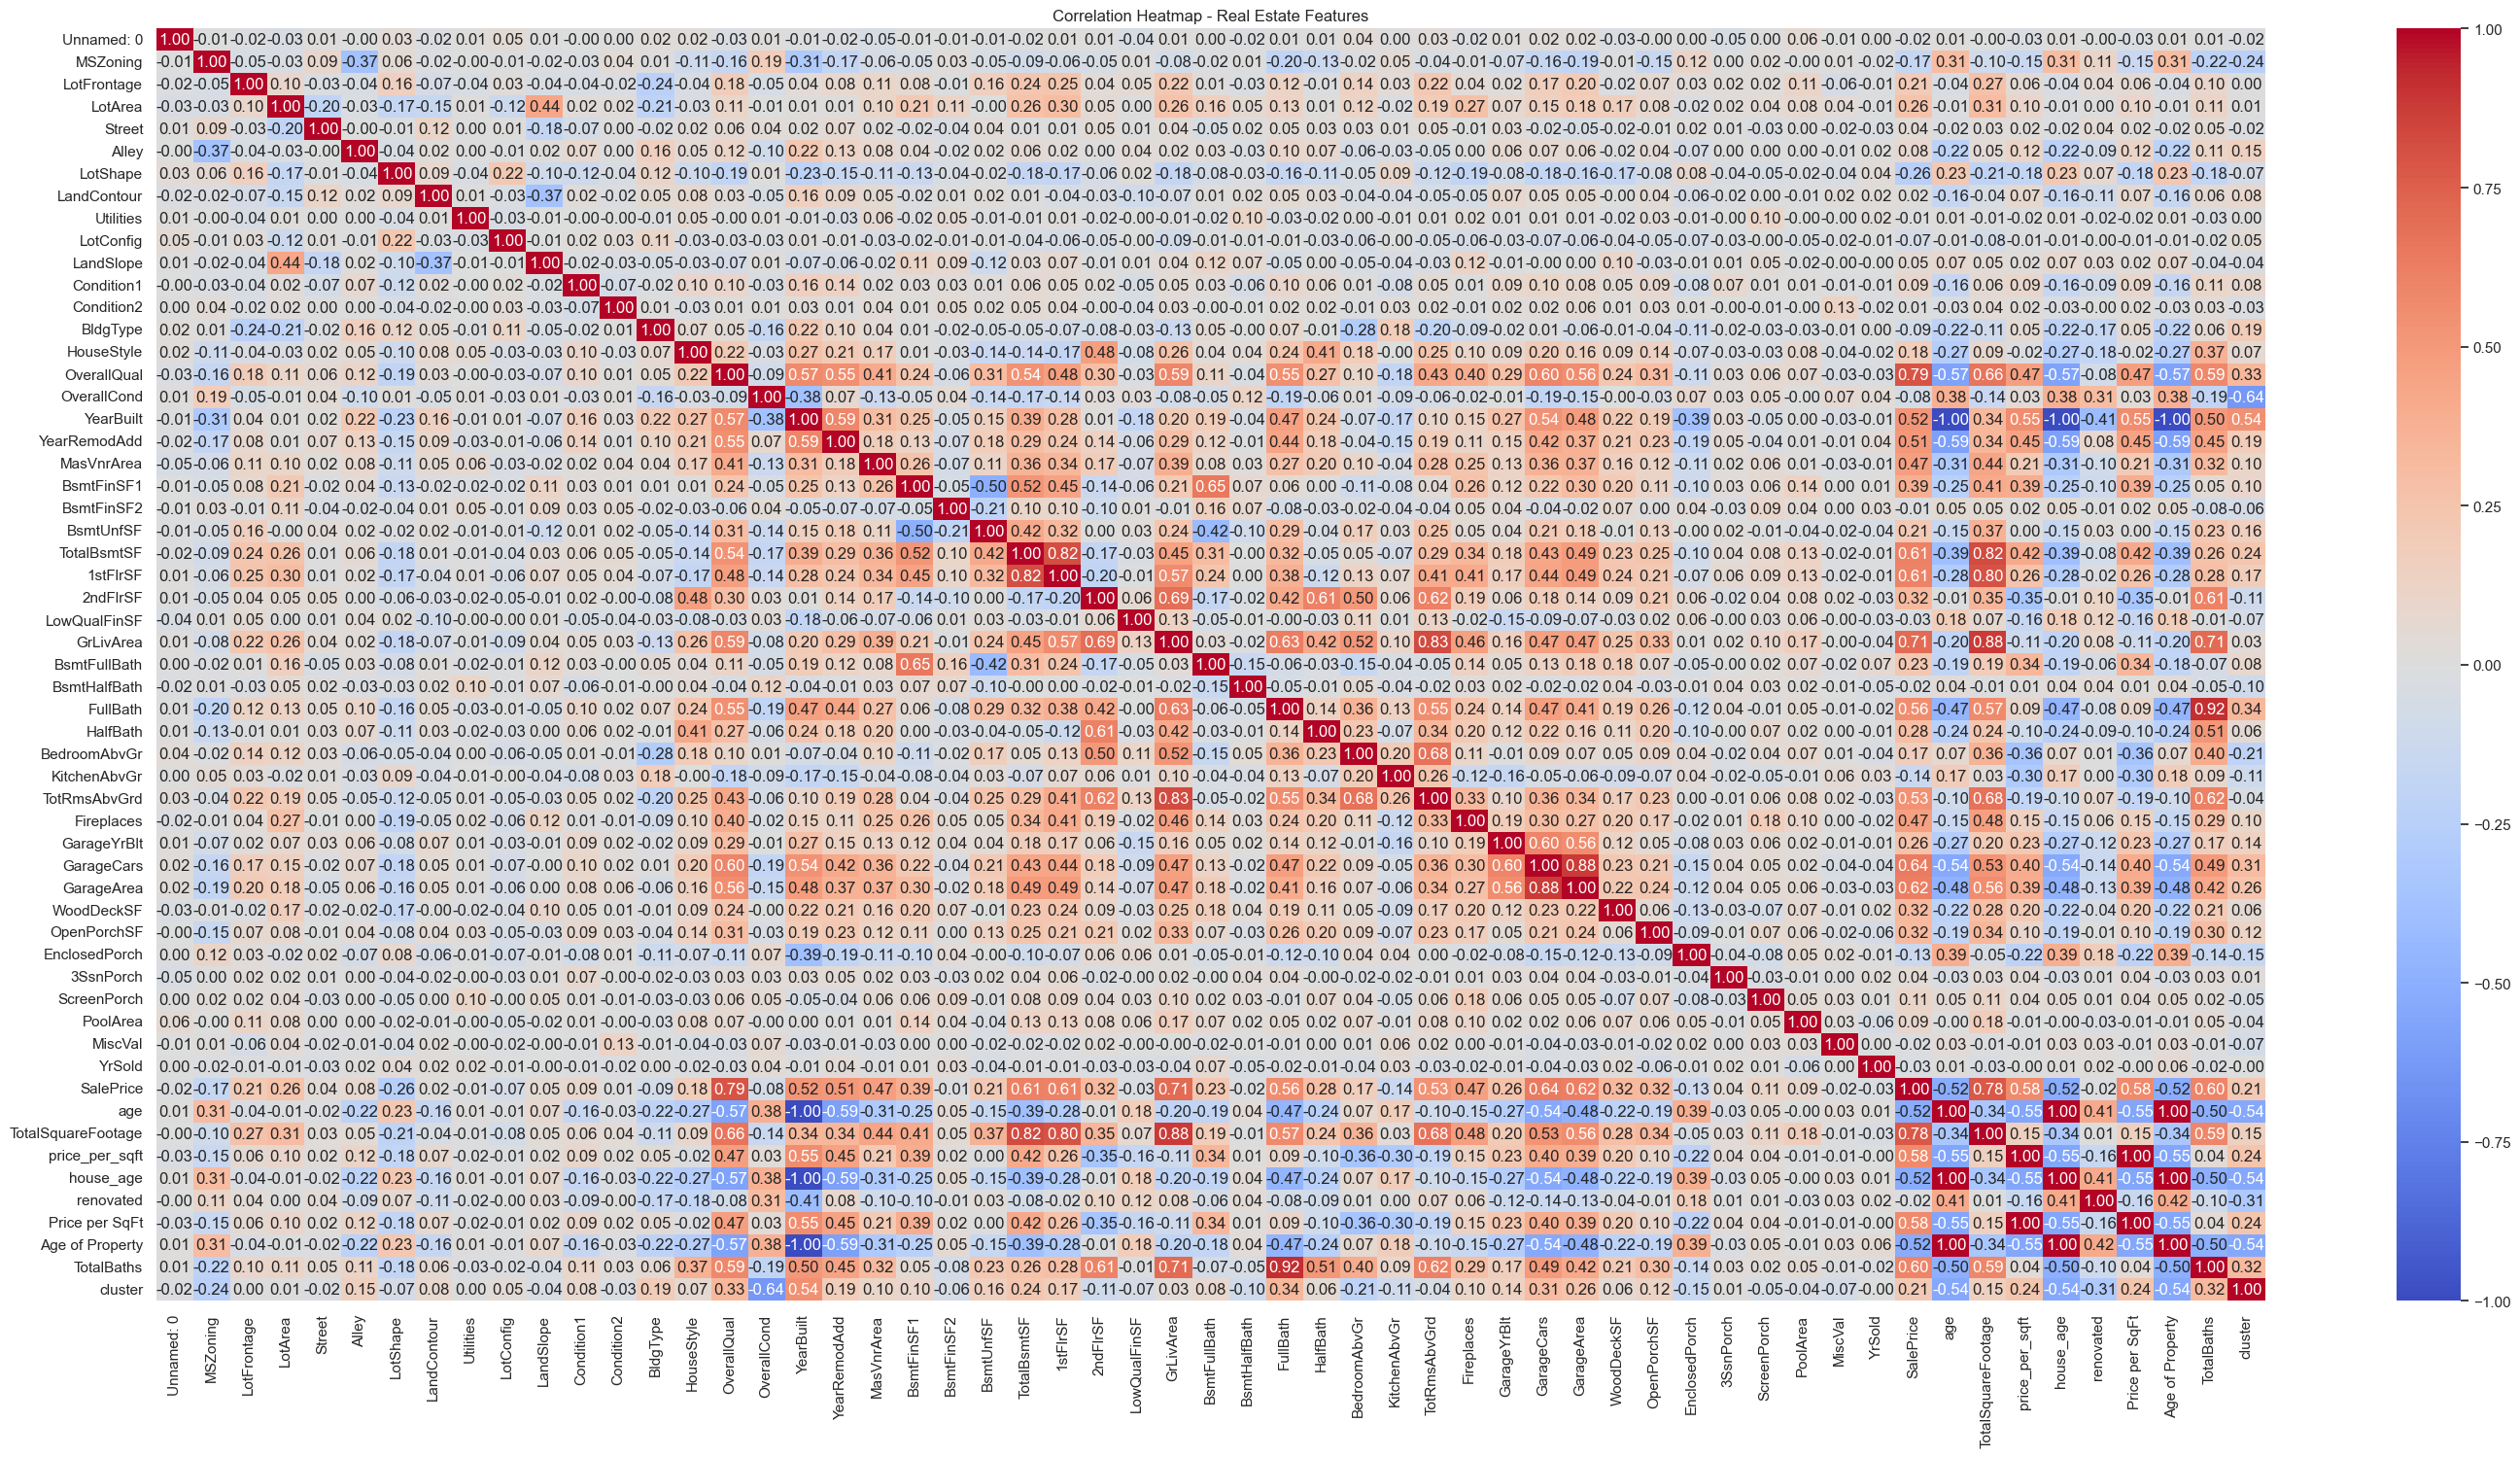

In [295]:

# Define the key columns
col_list = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 
            'TotRmsAbvGrd', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'BsmtQual', 'HeatingQC', 'MasVnrType', 
            'SaleCondition', 'SalePrice']

# Subset the dataset
data_set = data[col_list]

# Select only numeric columns from the full dataset
numeric_cols = data.select_dtypes(include=['number']).columns

# Correlation matrix for all numeric columns
correlation_matrix = data[numeric_cols].corr()

# Correlation matrix for selected features (only numeric ones from col_list + SalePrice)
selected_numeric_cols = data_set.select_dtypes(include=['number']).columns
c2 = data_set[selected_numeric_cols].corr()

# Plot heatmap for selected numeric features
plt.figure(figsize=(20, 10))
sns.heatmap(c2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Key Column Real Estate Features')
plt.show()
plt.figure(figsize=(35, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Real Estate Features')
plt.show()


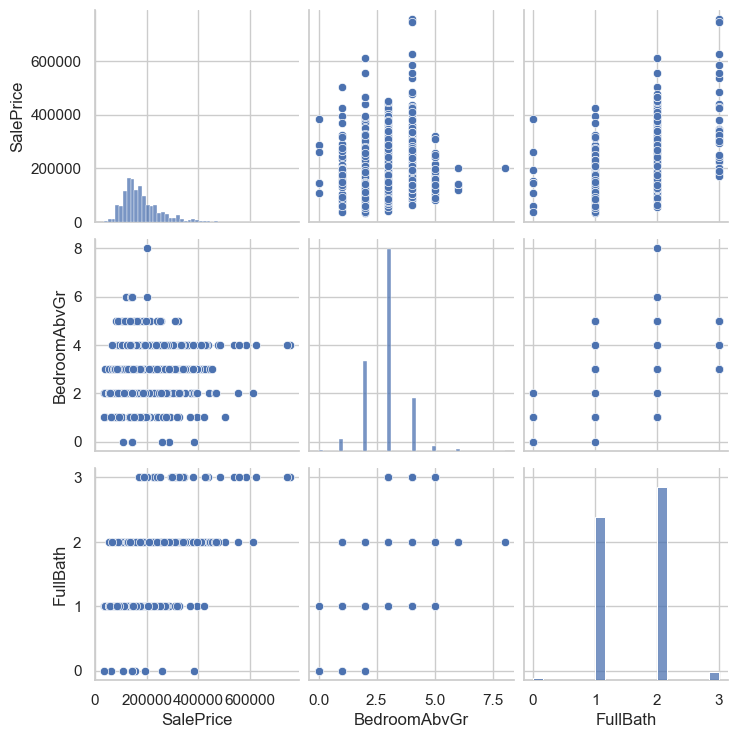

In [83]:
sns.pairplot(data[['SalePrice', 'BedroomAbvGr', 'FullBath']])
plt.show()

In [55]:
data.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

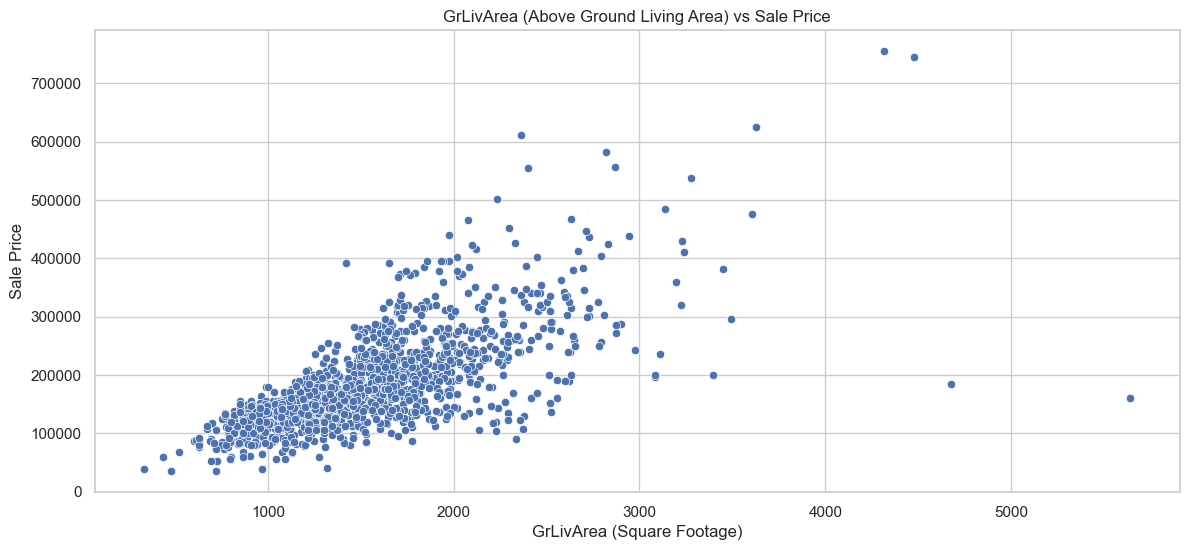

In [57]:
# Scatter plot between GrLivArea (above-ground living area) and SalePrice
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('GrLivArea (Above Ground Living Area) vs Sale Price')
plt.xlabel('GrLivArea (Square Footage)')
plt.ylabel('Sale Price')
plt.show()


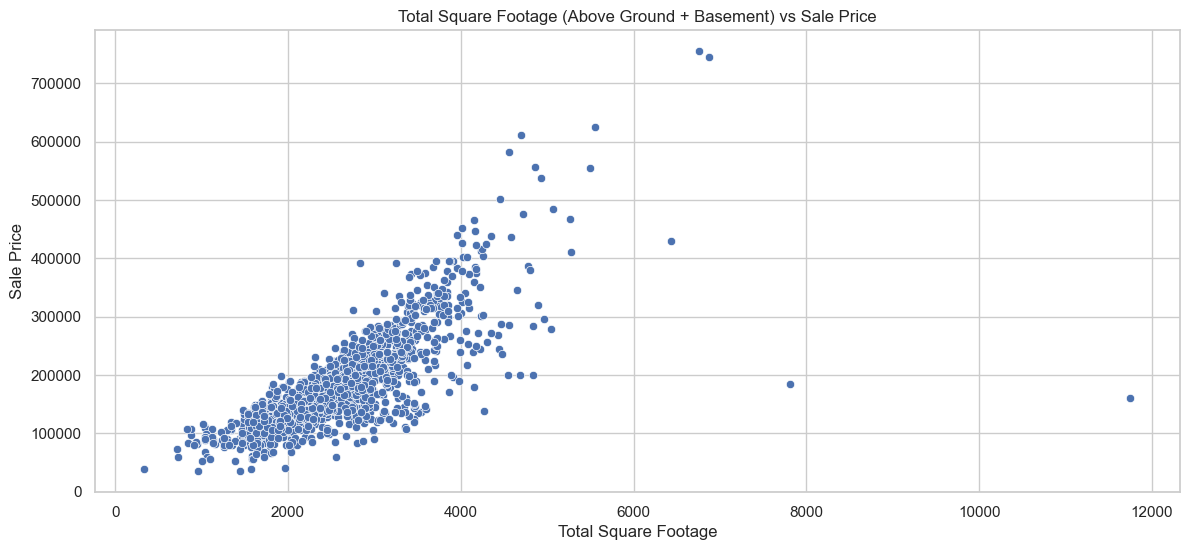

In [59]:
# Create a new feature combining above ground and basement square footage
data['TotalSquareFootage'] = data['GrLivArea'] + data['TotalBsmtSF']

# Scatter plot between total square footage and SalePrice
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['TotalSquareFootage'], y=data['SalePrice'])
plt.title('Total Square Footage (Above Ground + Basement) vs Sale Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.show()


# Feature Engineering

In [120]:
data['price_per_sqft'] = data['SalePrice'] / data['GrLivArea']
data['house_age'] = 2025 - data['YearBuilt']
#data['renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)
data['renovated'] = np.where(data['YearRemodAdd'] > data['YearBuilt'], 1, 0)
#print(data[['SalePrice', 'GrLivArea', 'YearBuilt', 'renovated']].head())
data[['SalePrice', 'GrLivArea', 'YearBuilt', 'renovated']].head()

SalePrice  GrLivArea  YearBuilt  renovated
0     208500       1710       2003          0
1     181500       1262       1976          0
2     223500       1786       2001          1
3     140000       1717       1915          1
4     250000       2198       2000          0

In [99]:
# Calculate price per square foot and property age
data['Price per SqFt'] = data['SalePrice'] / data['GrLivArea']
data['Age of Property'] = data ['YrSold'] - data['YearBuilt']
data['renovated'] = np.where(data['YearRemodAdd'] > data['YearBuilt'], 1, 0)
# Display the new features
data[['Price per SqFt', 'Age of Property']].head()


Price per SqFt  Age of Property
0      121.929825                5
1      143.819334               31
2      125.139978                7
3       81.537566               91
4      113.739763                8

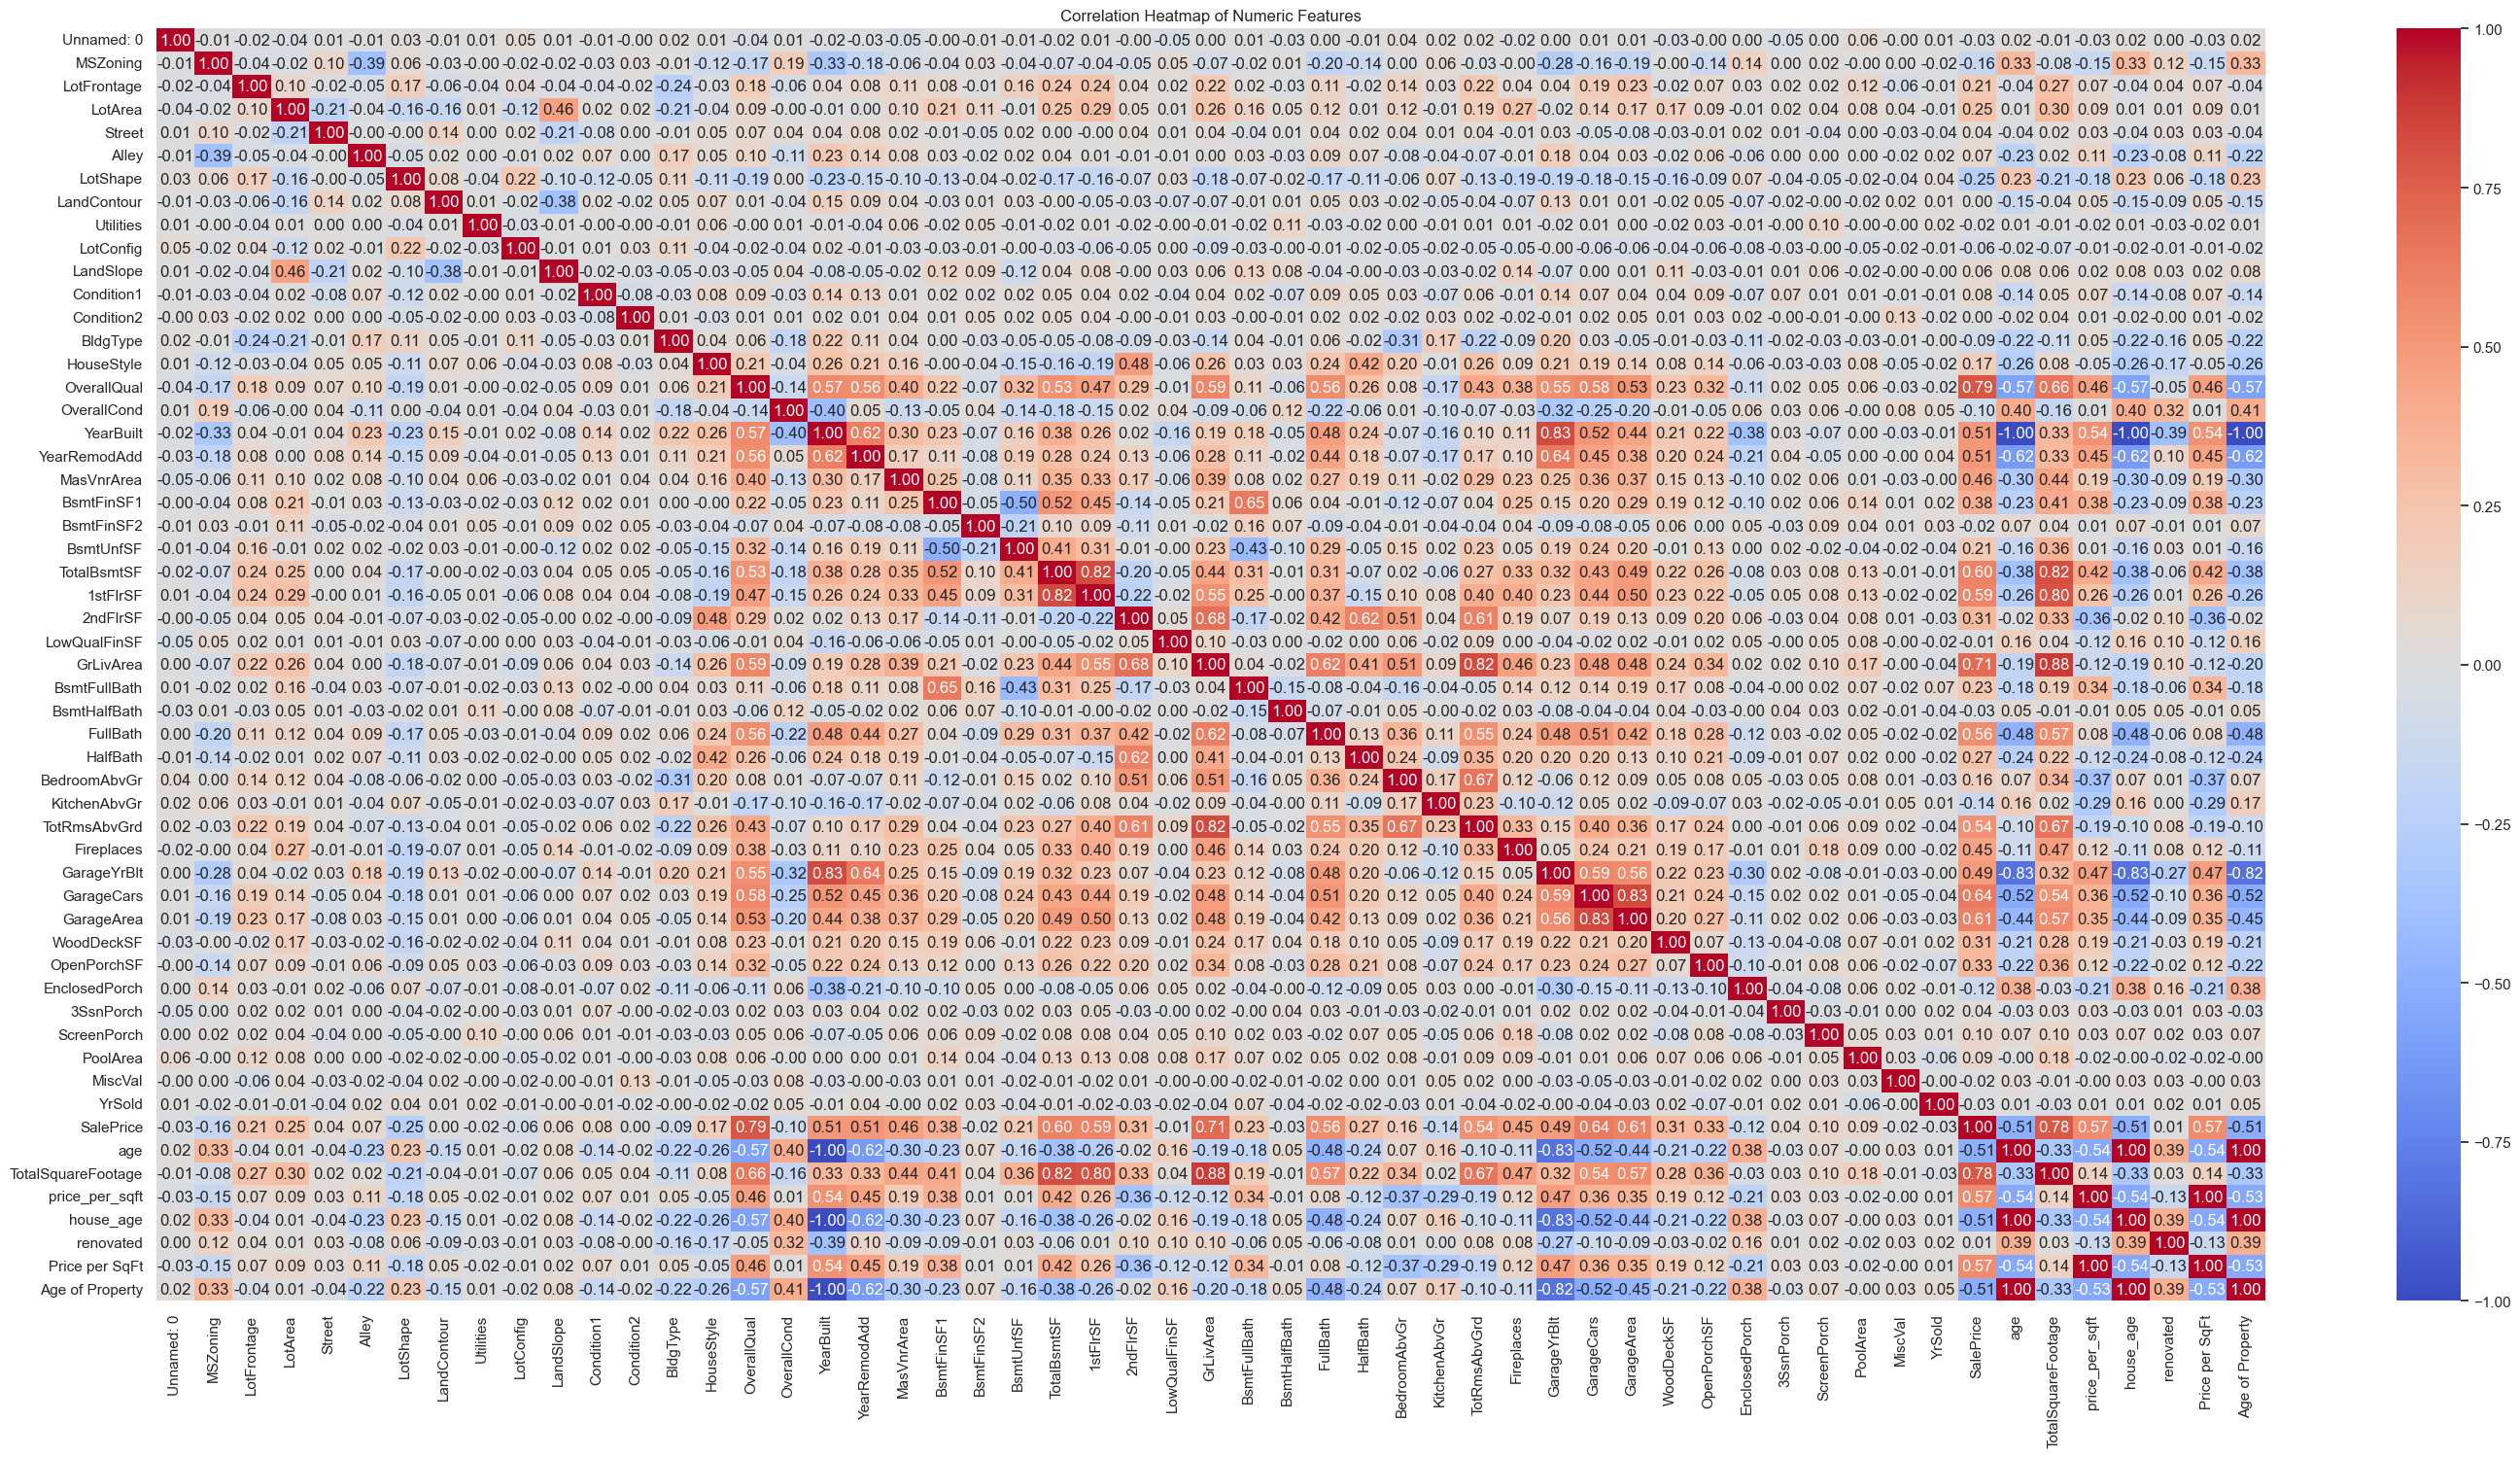

In [105]:
# Filter only numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Check if there are any NaNs and handle them
numeric_df = numeric_df.dropna()

# Plot correlation heatmap
plt.figure(figsize=(35, 17))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Feature Engineering and Size Impact

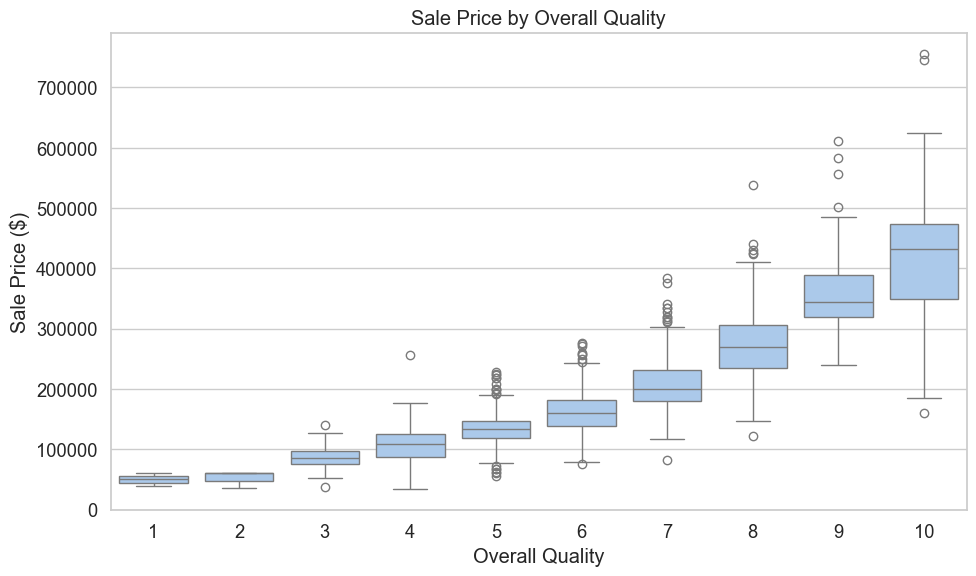

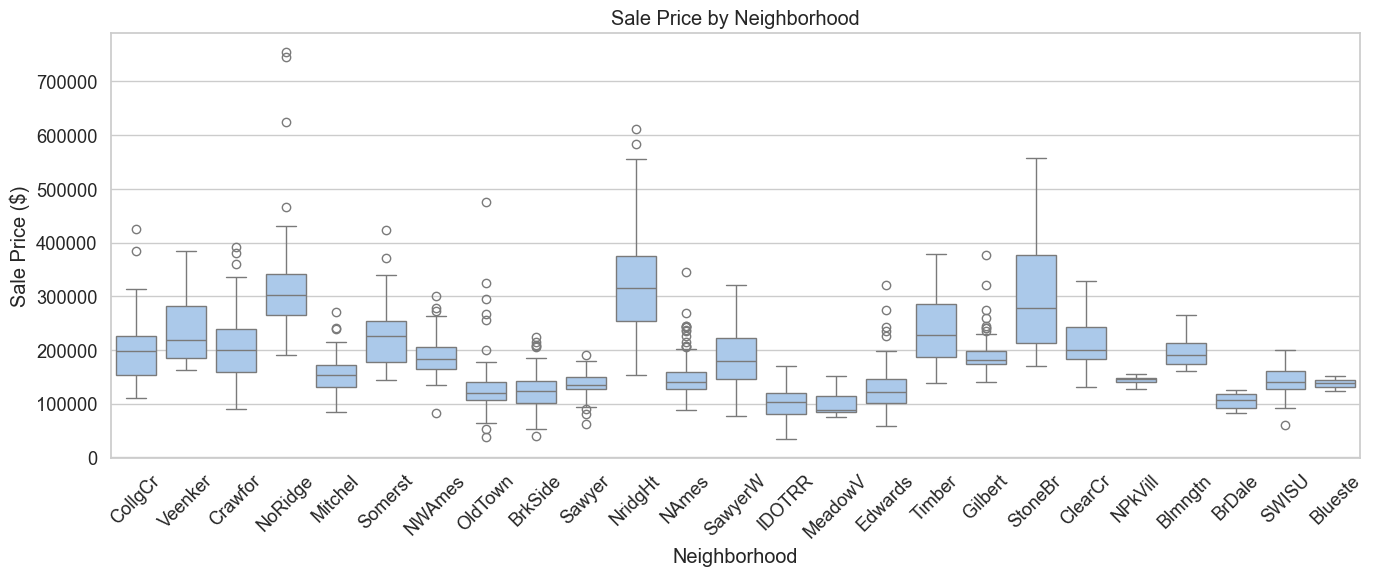

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better visual style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Remove missing values if necessary
#data = data.dropna(subset=['SalePrice', 'OverallQual', 'Neighborhood'])

# 1. Boxplot: OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='OverallQual', y='SalePrice')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.savefig('overallqual_vs_price.png', dpi=300)
plt.show()

# 2. Boxplot: Neighborhood vs SalePrice
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Neighborhood', y='SalePrice')
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('neighborhood_vs_price.png', dpi=300)
plt.show()


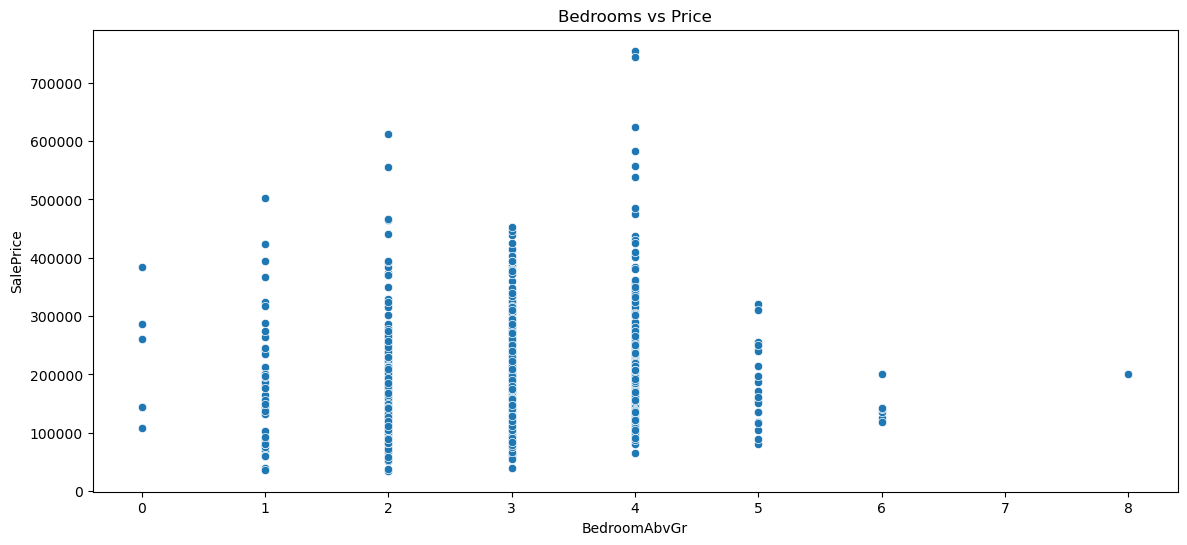

In [145]:
# Scatter plot for bedrooms vs price
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.title('Bedrooms vs Price')
plt.show()

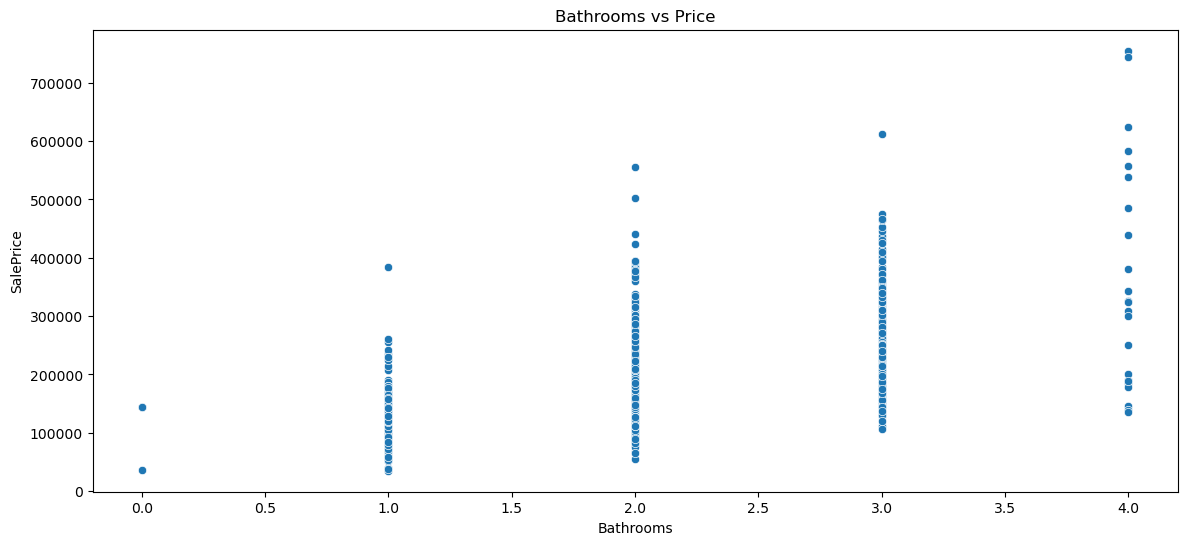

In [82]:

data['Bathrooms'] = data['HalfBath'] + data['FullBath']
# Scatter plot for bathrooms vs price
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['Bathrooms'], y=data['SalePrice'])
plt.title('Bathrooms vs Price')
plt.show()


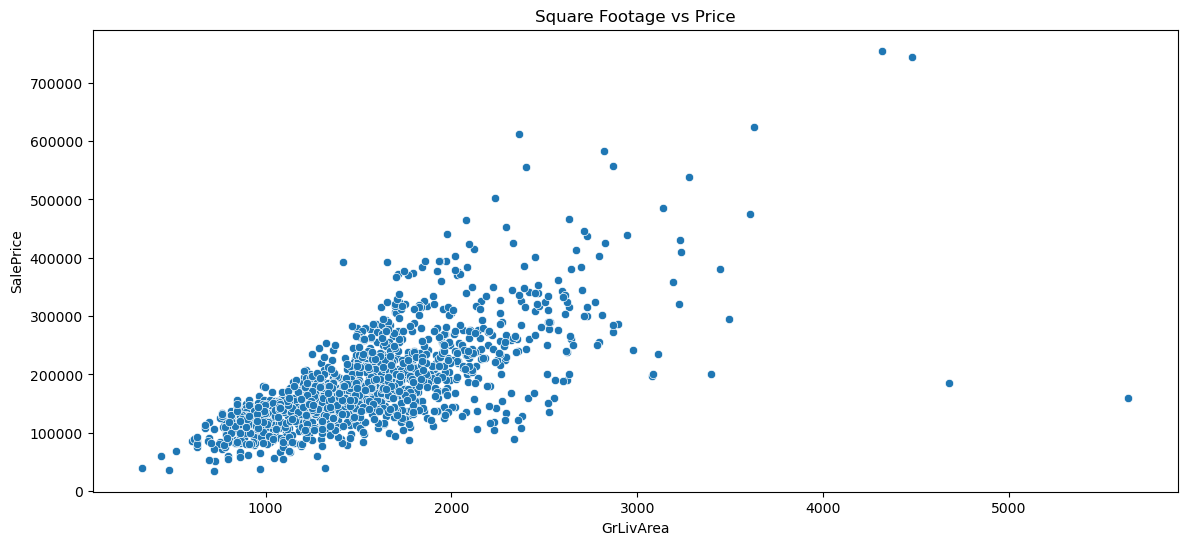

In [84]:
# Scatter plot for square footage vs price
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('Square Footage vs Price')
plt.show()

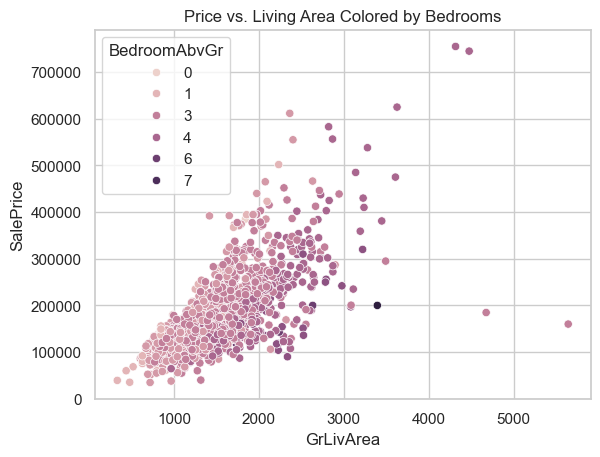

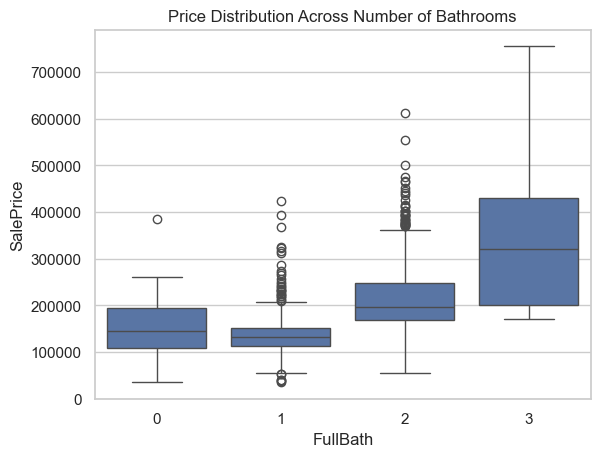

In [136]:
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', hue='BedroomAbvGr')
plt.title('Price vs. Living Area Colored by Bedrooms')
plt.show()

sns.boxplot(x='FullBath', y='SalePrice', data=data)
plt.title('Price Distribution Across Number of Bathrooms')
plt.show()


# Market Trends and Historical Pricing

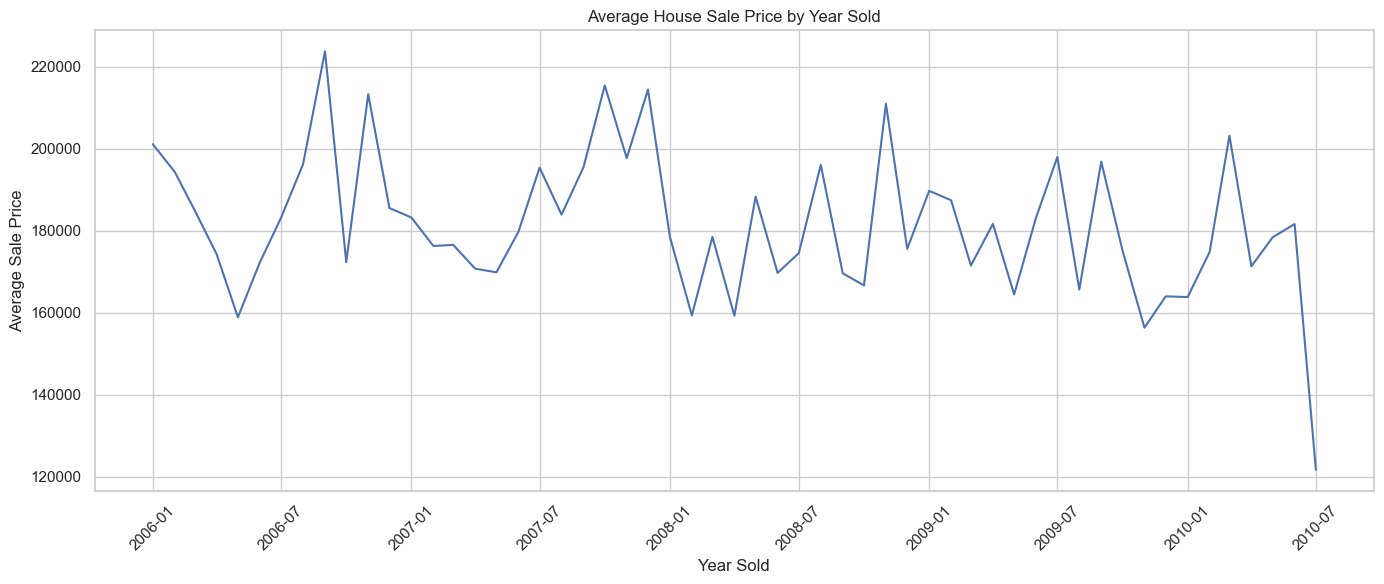

In [174]:
#data['date'] = pd.to_datetime(data['date'])
#data['year'] = data['date'].dt.year

#price_trend = data.groupby('year')['price'].mean().reset_index()
#sns.lineplot(data=price_trend, x='year', y='price')
#plt.title('Average House Price by Year')
#plt.show()

# Create a 'SoldDate' column combining YrSold and MoSold

data['SoldDate'] = pd.to_datetime(data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str) + '-01')
price_trend = data.groupby('SoldDate')['SalePrice'].mean().reset_index()
# Group by date and average
monthly_trend = data.groupby('SoldDate')['SalePrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=price_trend, x='SoldDate', y='SalePrice')
plt.title('Average House Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


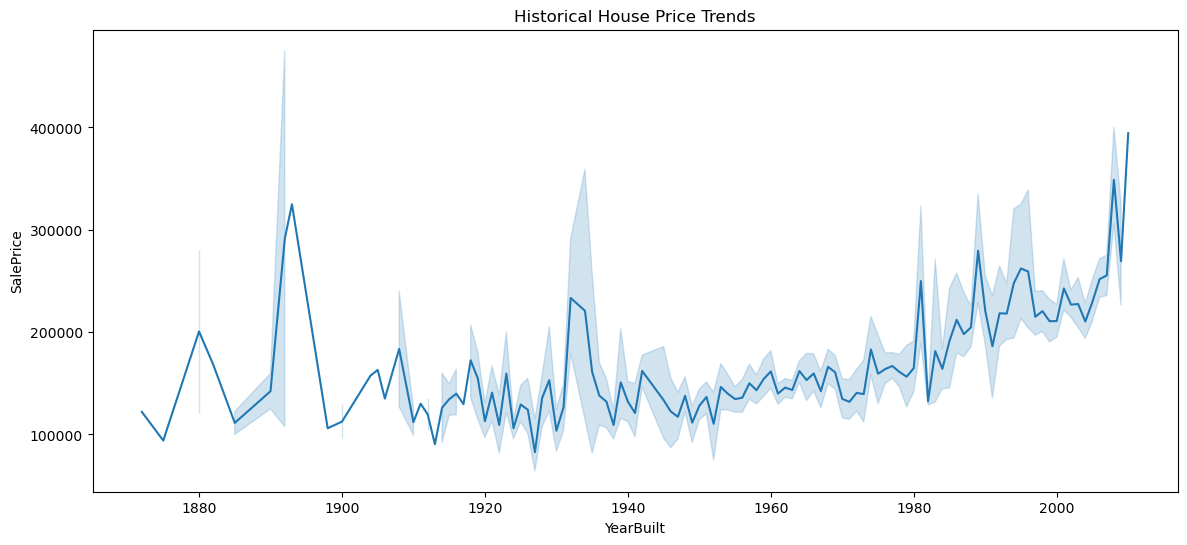

In [204]:
# Assuming 'Year' and 'Price' are columns in the dataset
plt.figure(figsize=(14, 6))
sns.lineplot(x=data['YearBuilt'], y=data['SalePrice'])
plt.title('Historical House Price Trends')
plt.show()

# Customer Preferences and Amenities

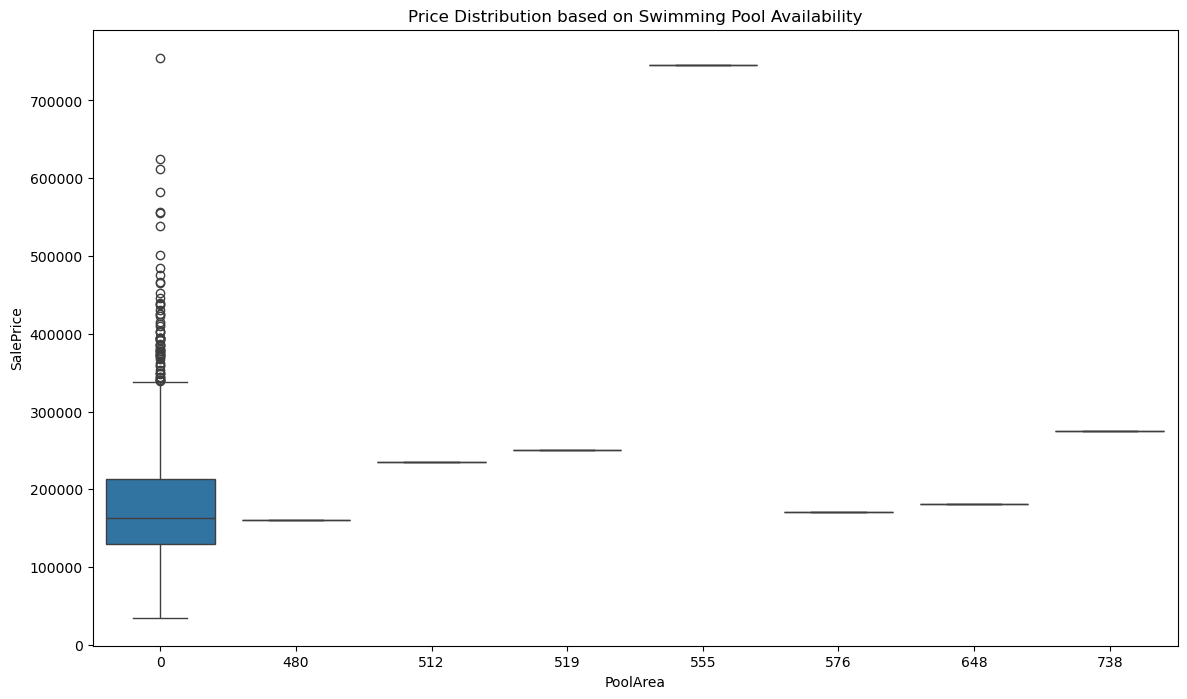

In [206]:
# Boxplot to show price distribution based on presence of amenities
plt.figure(figsize=(14, 8))
sns.boxplot(x=data['PoolArea'], y=data['SalePrice'])
plt.title('Price Distribution based on Swimming Pool Availability')
plt.show()

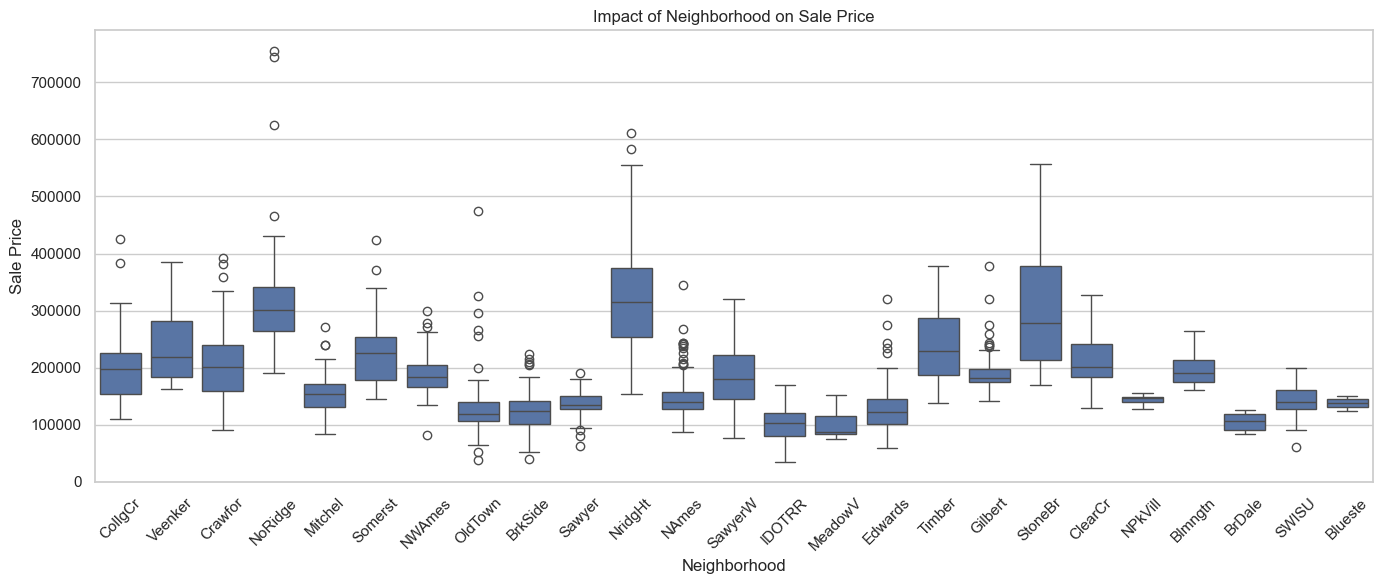

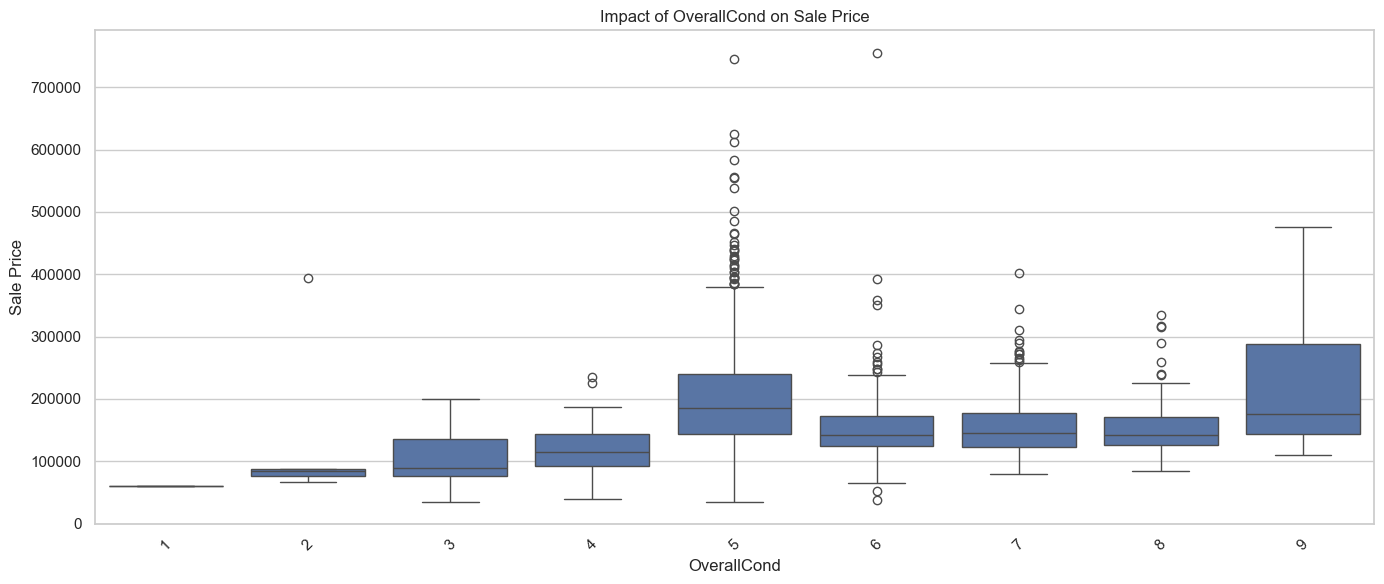

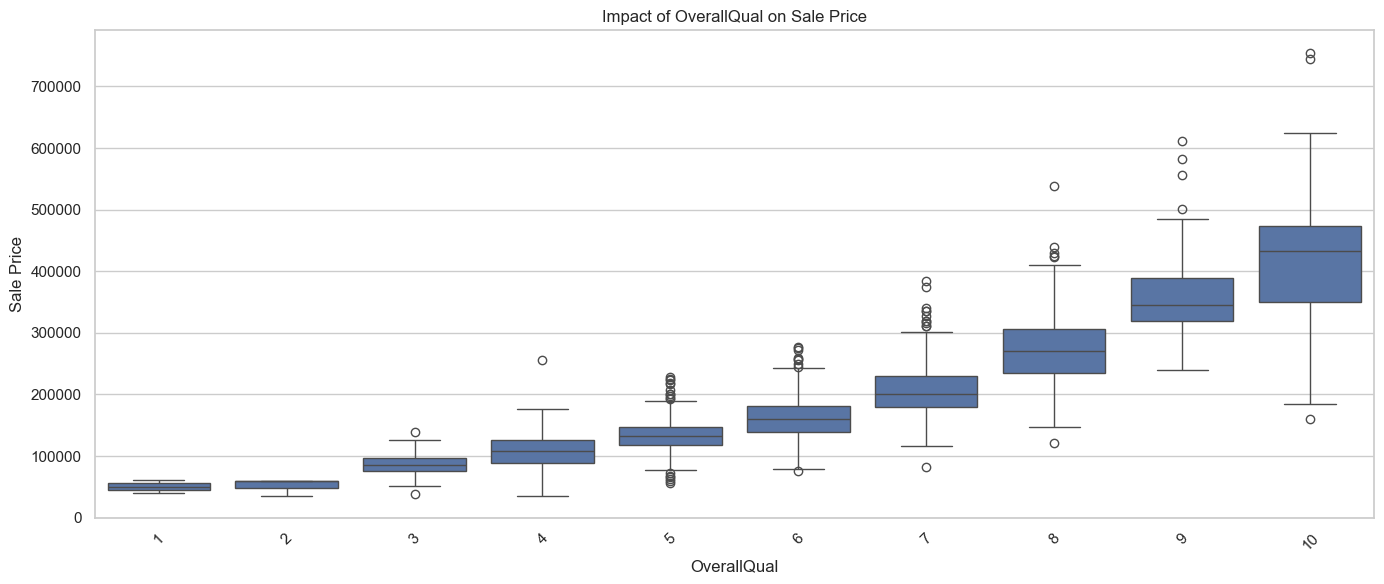

In [180]:
# Updated amenities list based on Ames dataset
amenities = ['Neighborhood', 'OverallCond', 'OverallQual']

for a in amenities:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=a, y='SalePrice', data=data)
    plt.title(f'Impact of {a} on Sale Price')
    plt.xlabel(a)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


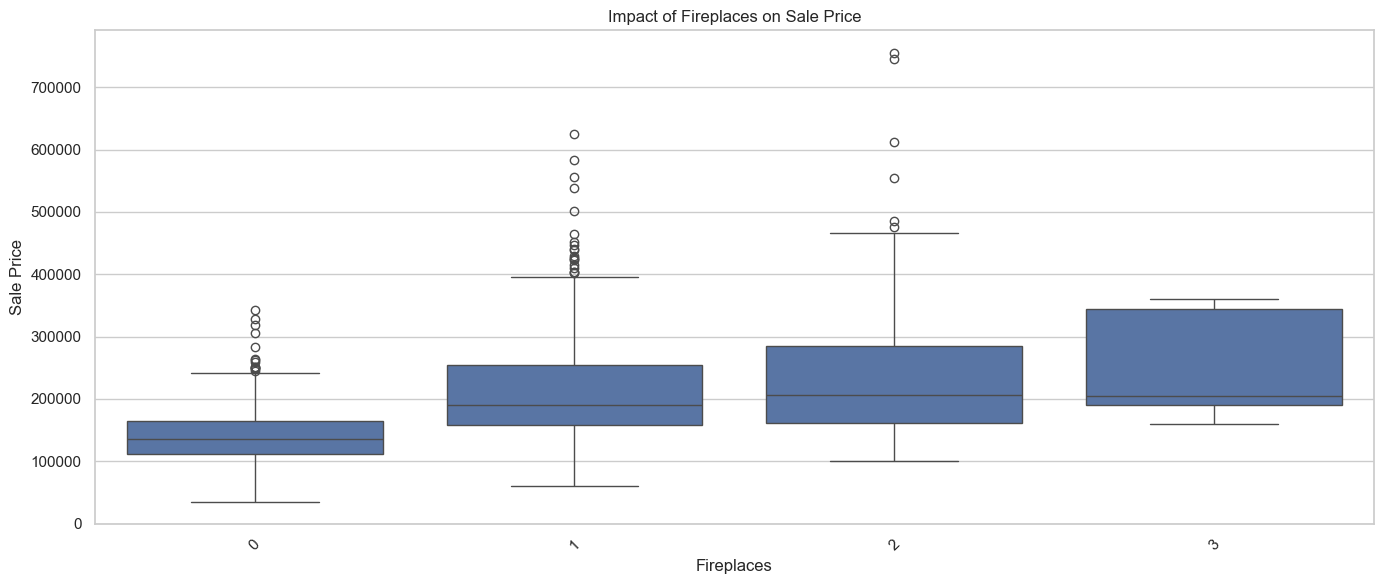

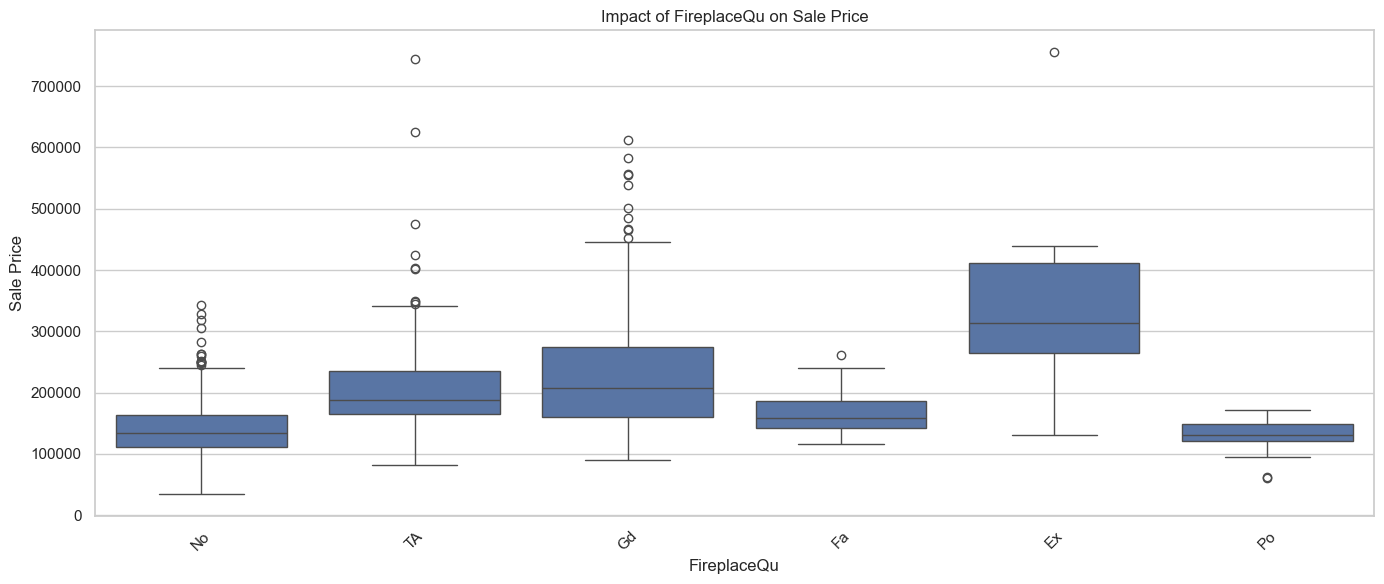

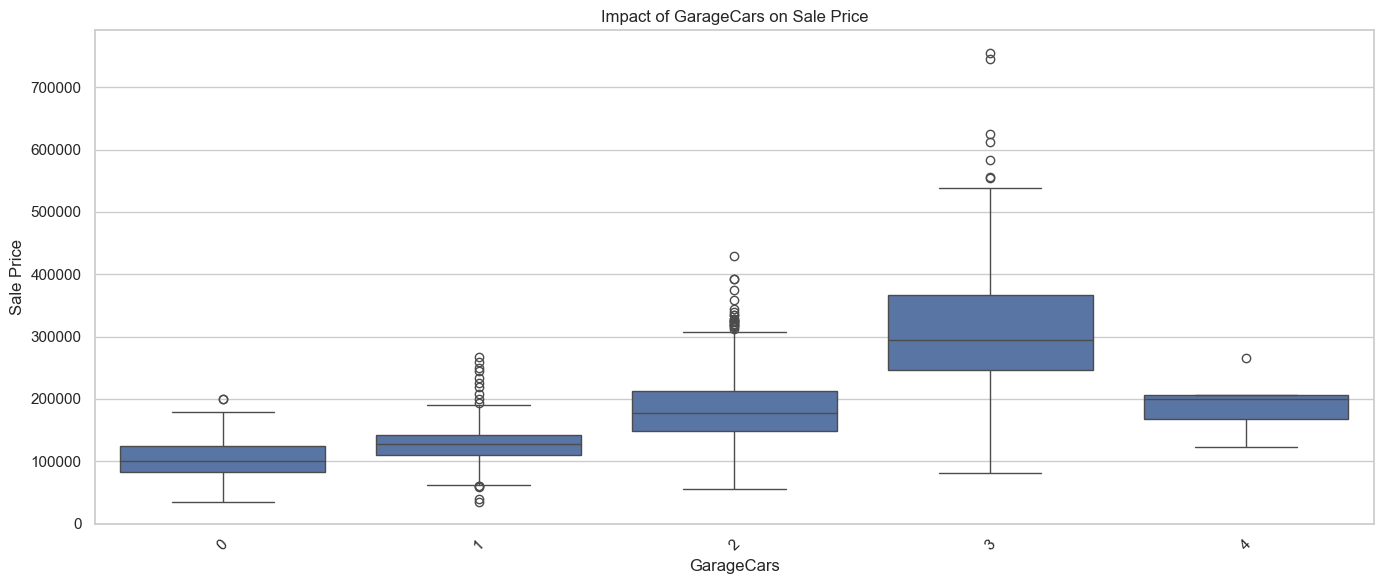

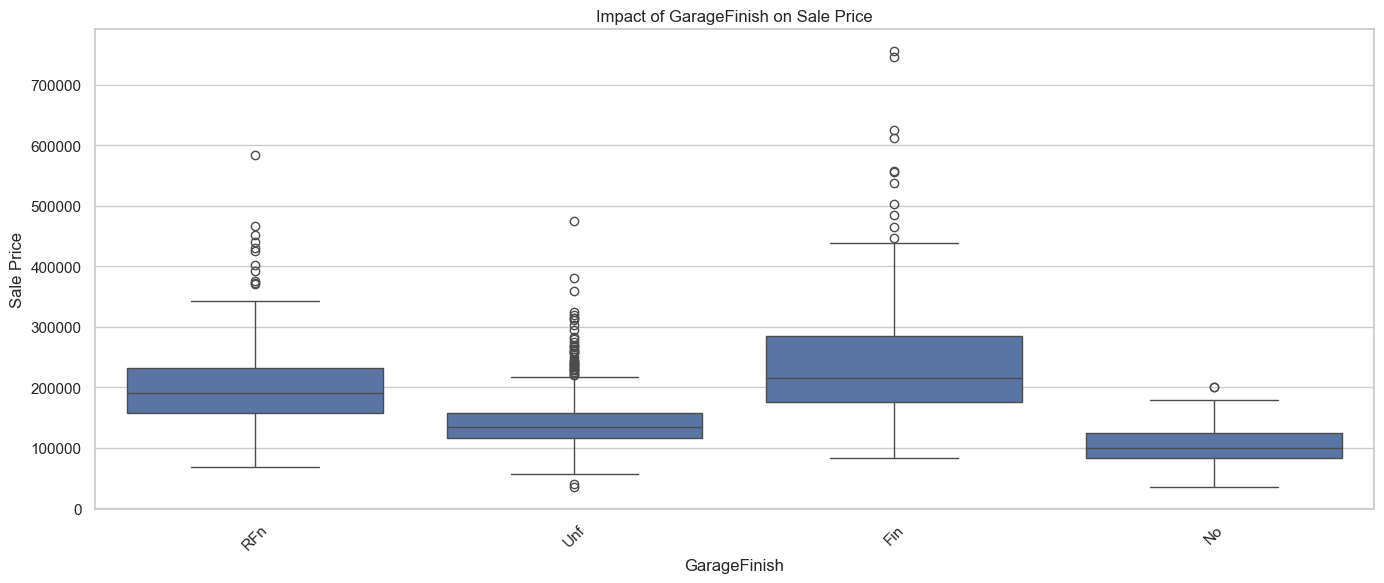

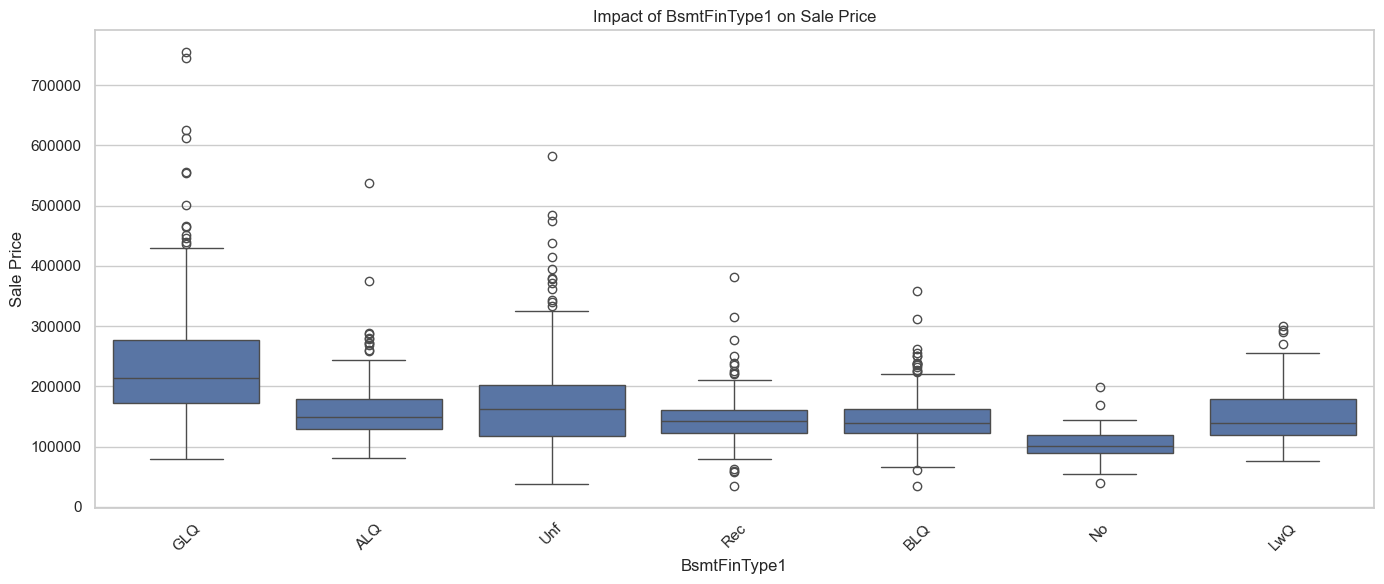

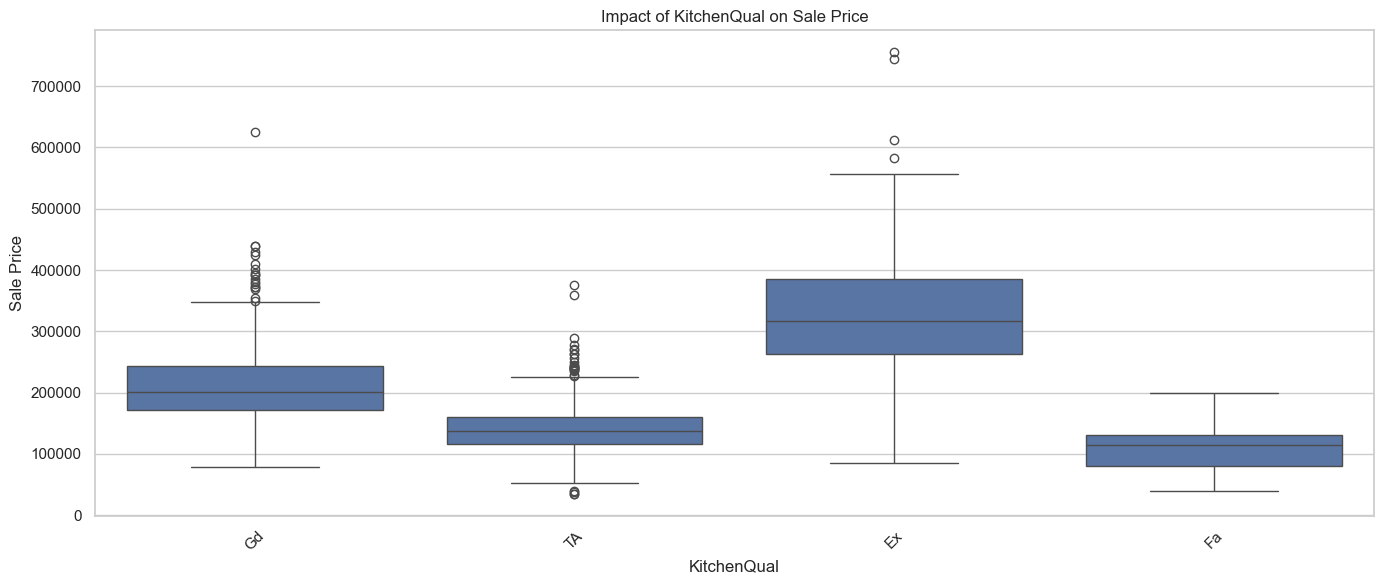

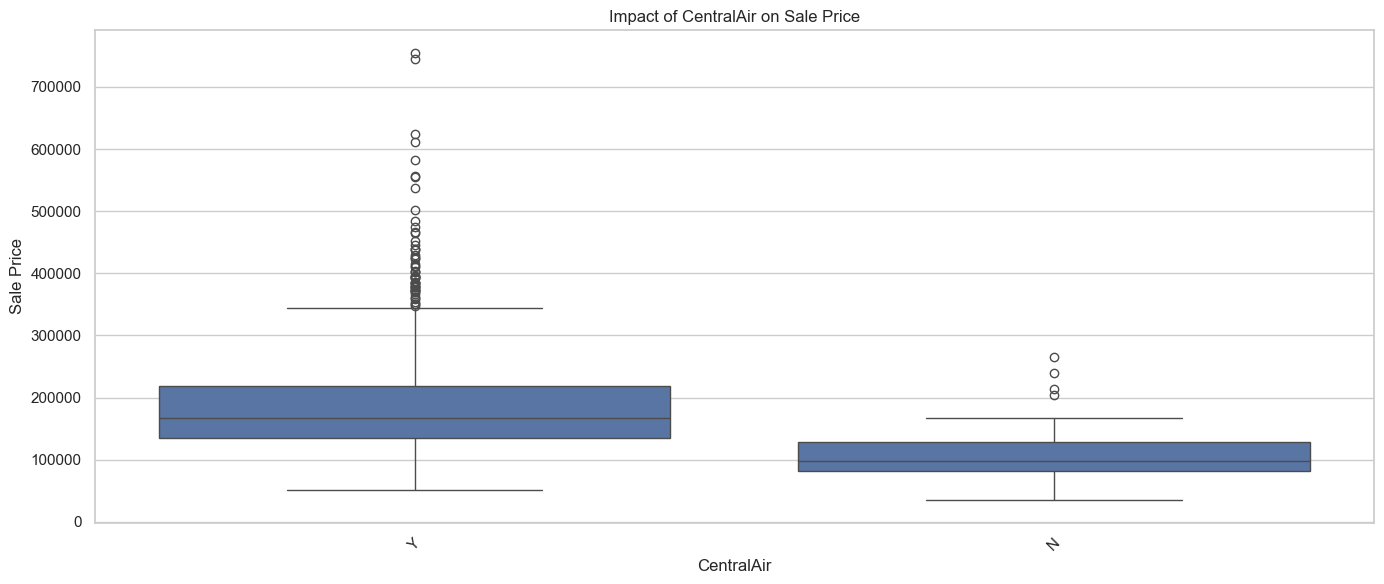

In [184]:
amenities = ['Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageFinish',
             'BsmtFinType1', 'KitchenQual', 'CentralAir']

for a in amenities:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=a, y='SalePrice', data=data)
    plt.title(f'Impact of {a} on Sale Price')
    plt.xlabel(a)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [106]:
import os
os.environ["OMP_NUM_THREADS"] = "6"

from sklearn.cluster import KMeans

# Select features for clustering (like PoolArea, GarageArea, BedroomAbvGr, Bathrooms)
features = data[['PoolArea', 'GarageArea', 'BedroomAbvGr', 'HalfBath', 'FullBath']]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and assign clusters
data['Cluster'] = kmeans.fit_predict(features)

# Check the first few rows to verify the clusters
print(data[['PoolArea', 'GarageArea', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'Cluster']].head())


   PoolArea  GarageArea  BedroomAbvGr  HalfBath  FullBath  Cluster
0         0         548             3         1         2        0
1         0         460             3         0         2        0
2         0         608             3         1         2        0
3         0         642             3         0         1        0
4         0         836             4         1         2        1


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


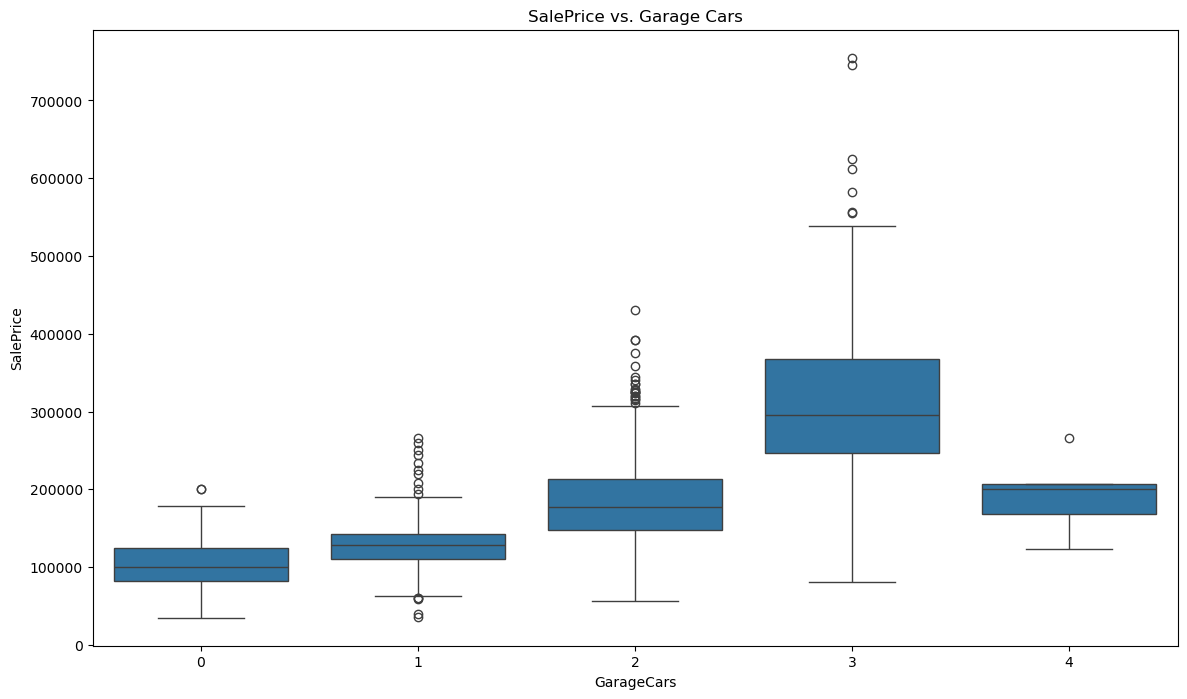

In [208]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='GarageCars', y='SalePrice', data=data)
plt.title('SalePrice vs. Garage Cars')
plt.show()


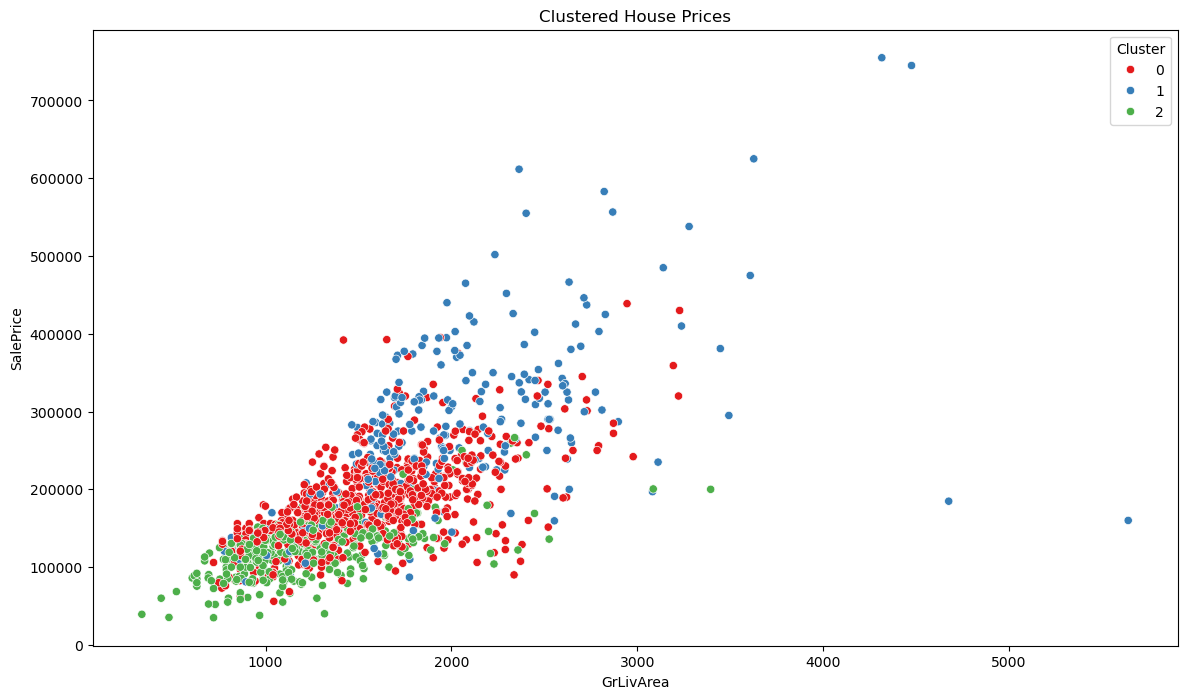

In [114]:
# Visualize the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'], hue=data['Cluster'], palette='Set1')
plt.title('Clustered House Prices')
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


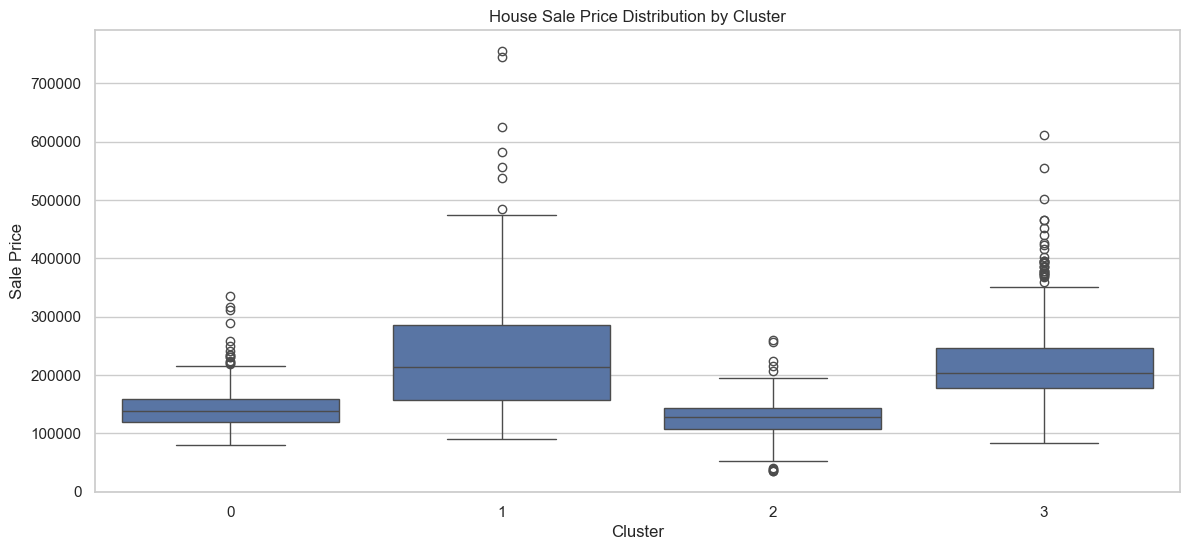

In [188]:
data['TotalBaths'] = data['FullBath'] + 0.5 * data['HalfBath']
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Create TotalBaths if needed
data['TotalBaths'] = data['FullBath'] + 0.5 * data['HalfBath']

# Select features for clustering
features = data[['BedroomAbvGr', 'TotalBaths', 'GrLivArea', 'OverallQual', 'OverallCond']]

# Optional: scale features for better clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot price distribution across clusters
plt.figure(figsize=(14, 6))
sns.boxplot(x='cluster', y='SalePrice', data=data)
plt.title('House Sale Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sale Price')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31472\4032699907.py:12: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31472\4032699907.py:12: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31472\4032699907.py:12: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATI

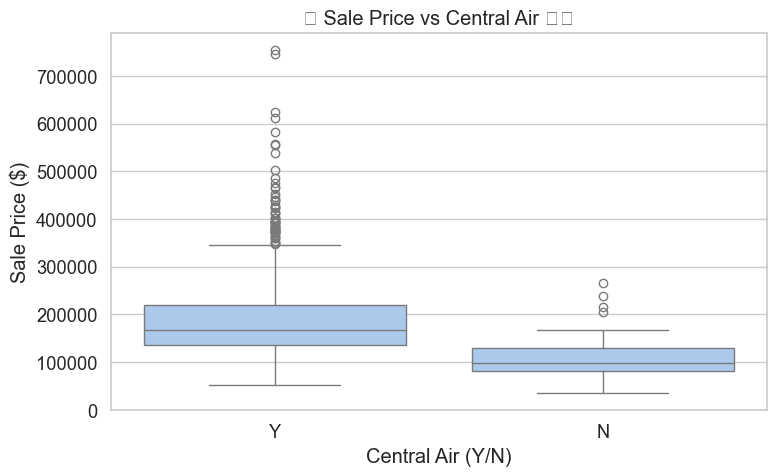

In [303]:
# Set visual style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='CentralAir', y='SalePrice')

# Title and labels
plt.title('🏠 Sale Price vs Central Air 🌬️')
plt.xlabel('Central Air (Y/N)')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

# CLustering

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31472\2269983239.py:31: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31472\2269983239.py:31: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(b

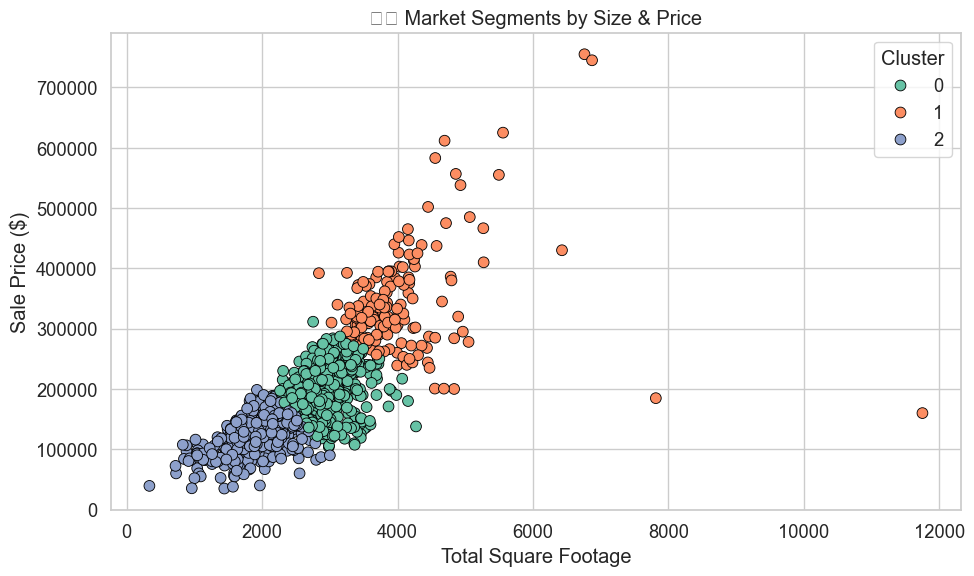

In [333]:
# Select features for clustering
features = data[['TotalSquareFootage', 'SalePrice']].dropna()

# Scale the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering (choose 3 or 4 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Add cluster labels back to the original DataFrame
features['cluster'] = data['cluster']

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=features,
    x='TotalSquareFootage',
    y='SalePrice',
    hue='cluster',
    palette='Set2',
    s=60,
    edgecolor='black'
)

plt.title('🏘️ Market Segments by Size & Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price ($)')
plt.legend(title='Cluster')
plt.tight_layout()
# Show the plot
plt.show()


# Strategic Pricing & Investment Recommendations

### Heatmap for Price per Square Foot by Neighborhood

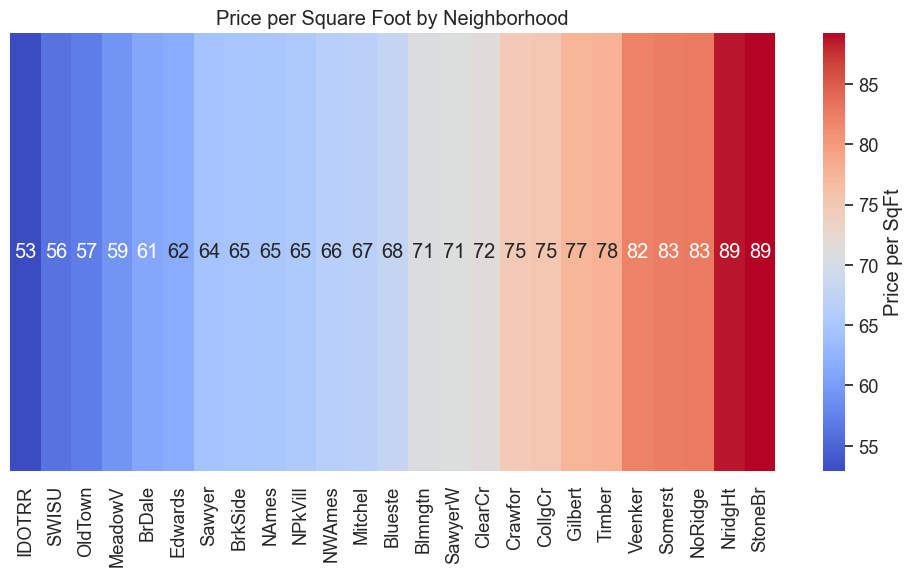

In [310]:
# Calculate price per square foot
data['price_per_sqft'] = data['SalePrice'] / data['TotalSquareFootage']

# Group by neighborhood and calculate mean price per square foot
neighborhood_prices = data.groupby('Neighborhood')['price_per_sqft'].mean().sort_values()

# Create a heatmap (Here, we use a bar plot for simplicity)
plt.figure(figsize=(10, 6))
sns.heatmap(neighborhood_prices.values.reshape(1, -1), annot=True, cmap='coolwarm', 
            yticklabels=[''], xticklabels=neighborhood_prices.index, cbar_kws={'label': 'Price per SqFt'})
plt.title('Price per Square Foot by Neighborhood')
plt.tight_layout()
plt.show()


### Scatter Plot: Sale Price vs. Garage Area (or Interior Quality)

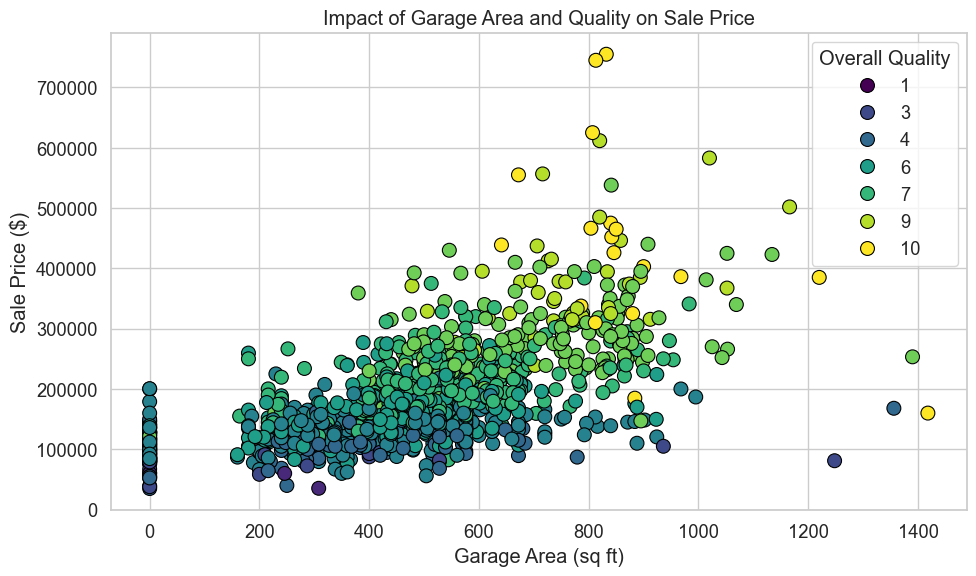

In [315]:
# Scatter plot for Sale Price vs Garage Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GarageArea', y='SalePrice', hue='OverallQual', palette='viridis', s=100, edgecolor='black')

plt.title('Impact of Garage Area and Quality on Sale Price')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Overall Quality')
plt.tight_layout()
plt.show()


### Cluster Plot for Homes Segmentation (Total Sqft vs SalePrice)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


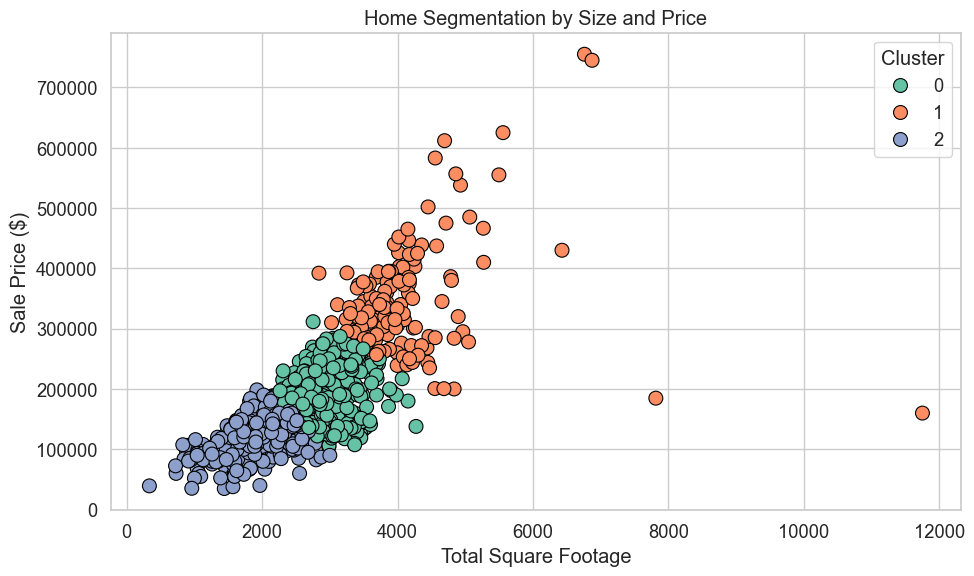

In [320]:
# Select relevant features
features = data[['TotalSquareFootage', 'SalePrice']].dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalSquareFootage', y='SalePrice', hue='cluster', palette='Set2', s=100, edgecolor='black')

plt.title('Home Segmentation by Size and Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price ($)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### Line Chart: Seasonal Trends (Average Sale Price by Month)

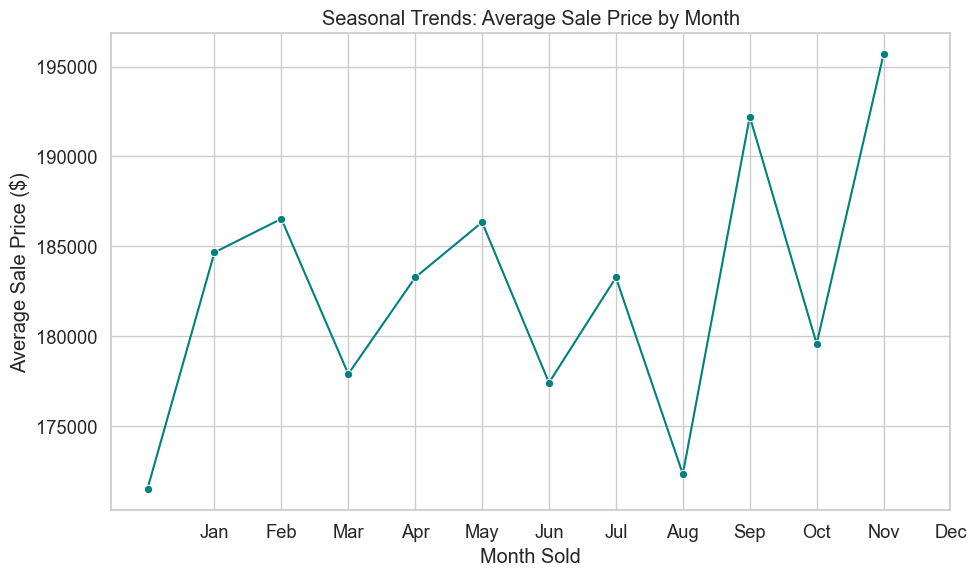

In [331]:
# Group by month and calculate average sale price
monthly_avg_price = data.groupby('MoSold')['SalePrice'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_price, x='MoSold', y='SalePrice', marker='o', color='teal')

# Label the axes and title
plt.title('Seasonal Trends: Average Sale Price by Month')
plt.xlabel('Month Sold')
plt.ylabel('Average Sale Price ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Layout and save
plt.tight_layout()
plt.savefig("seasonal_trends_saleprice_fixed.png", dpi=300)
plt.show()


# THANK YOU!